# **ĐỒ ÁN CUỐI KÌ THU THẬP VÀ TIỀN XỬ LÝ DỮ LIỆU.**

ĐỀ TÀI: PHÂN TÍCH CÁC YÊU TỐ ẢNH HƯỞNG ĐẾN ĐẾN RATING CỦA MỘT ĐẦU SÁCH.

# PHẦN 2: EDA.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Đồ Án-DS105/Data/Data_clean.csv')
del df['Unnamed: 0']
df.head(5)

,id,title,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre,isbn,description,awards,rating
0,136251,Harry Potter and the Deathly Hallows,Harry Potter,J.K. Rowling,3105877.0,71353.0,759.0,2007.0,Arthur A. Levine Books,Fantasy,0,1483,7,4.61
1,2767052,The Hunger Games,The Hunger Games,Suzanne Collins,7026399.0,179928.0,374.0,2008.0,Scholastic Press,Young Adult,1,1298,40,4.32
2,77203,The Kite Runner,Single,Khaled Hosseini,2654792.0,80553.0,371.0,2004.0,Riverhead Books,Fiction,0,1065,7,4.31
3,19063,The Book Thief,Single,Markus Zusak,2062051.0,121442.0,552.0,2006.0,Alfred A. Knopf,Historical,0,1383,19,4.38
4,1,Harry Potter and the Half-Blood Prince,Harry Potter,J.K. Rowling,2709343.0,44644.0,652.0,2006.0,Scholastic Inc.,Fantasy,0,1268,3,4.57


In [5]:
df.isna().sum()

id                 0
title              0
series             0
author             0
rating_count       0
review_count       0
number_of_pages    0
date_published     0
publisher          0
genre              0
isbn               0
description        0
awards             0
rating             0
dtype: int64

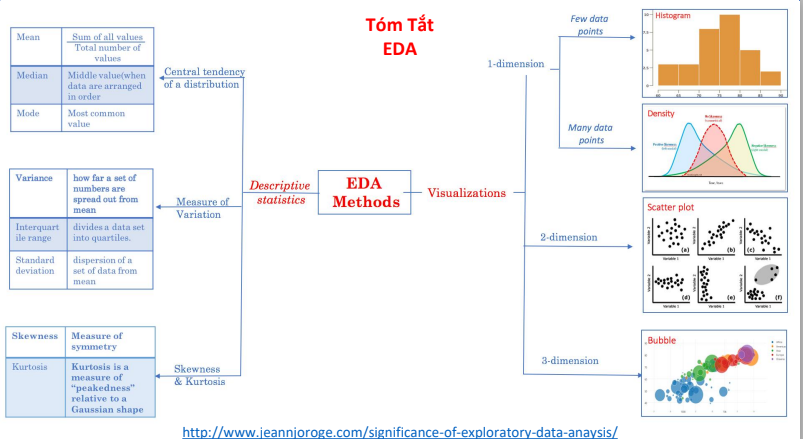

# 1. Phân Tích các biến phân loại.

In [6]:
df.head(1)

,id,title,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre,isbn,description,awards,rating
0,136251,Harry Potter and the Deathly Hallows,Harry Potter,J.K. Rowling,3105877.0,71353.0,759.0,2007.0,Arthur A. Levine Books,Fantasy,0,1483,7,4.61


## Rating

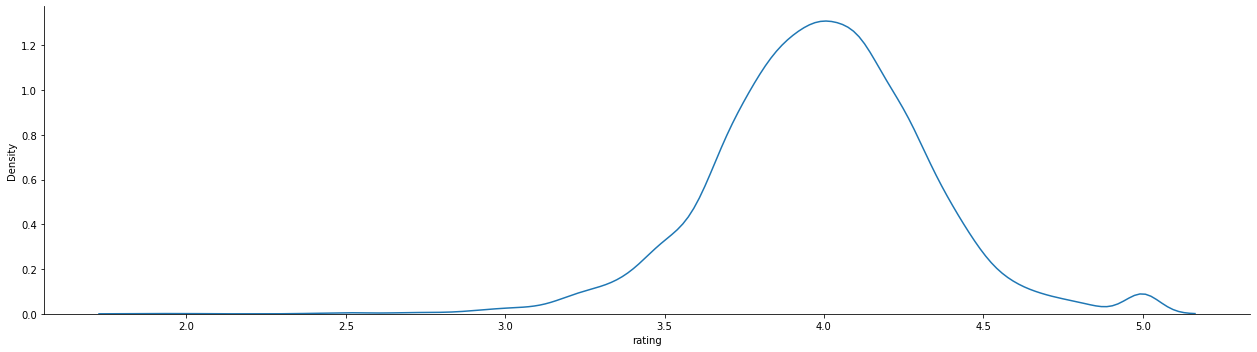

In [7]:
g=sns.displot(df, x="rating", kind="kde")
g.fig.set_figwidth(20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


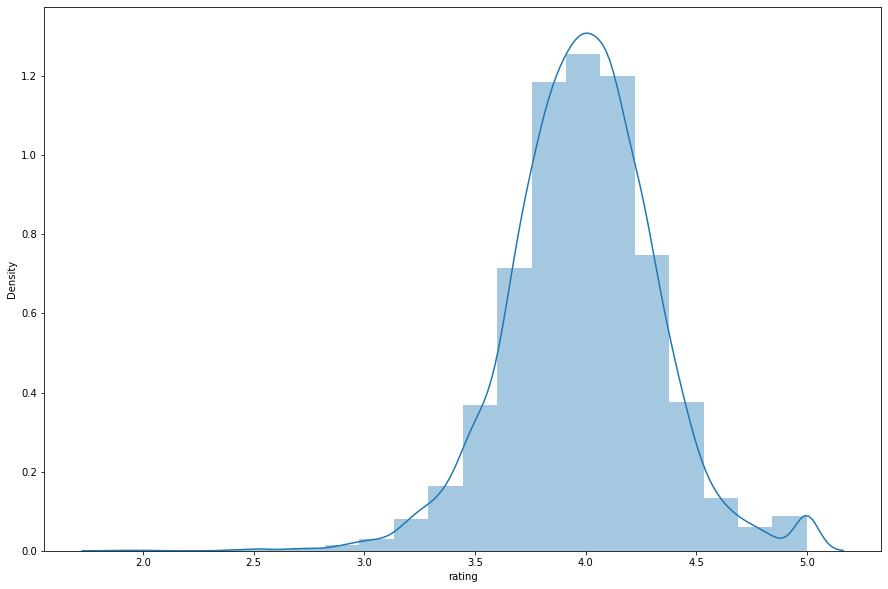

In [8]:
plt.figure(figsize=(15,10))
rating= df.rating.astype(float)
sns.distplot(rating, bins=20)

## Title

<p> 2 biểu đồ này cho thấy các tác giả có xu hướng đặt tên sách một cách ngắn gọn, súc tích. Ngoài ra có một số title có lượng kí tự lên đến hơn 100 ký tự (>20 từ)

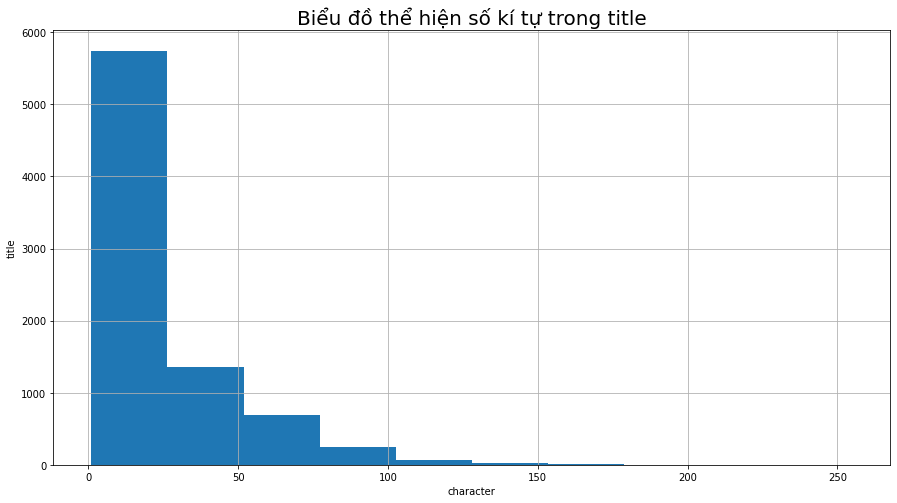

In [9]:
title_character_count = df['title'].str.len()
plt.figure(figsize=(15,8))
plt.title("Biểu đồ thể hiện số kí tự trong title",size=20)
plt.grid(True)
plt.rc('axes', axisbelow=True)
plt.hist(title_character_count)
plt.ylabel("title")
plt.xlabel("character")
plt.show()

Text(0.5, 0, 'word')

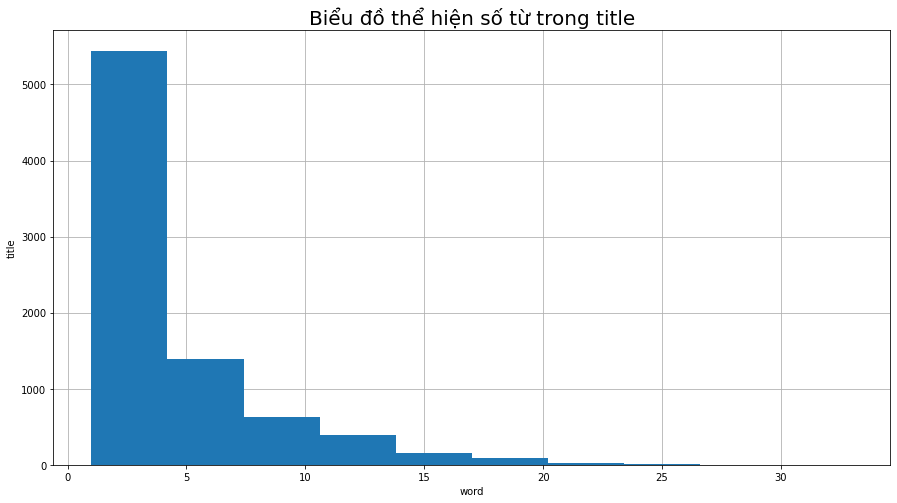

In [10]:
plt.figure(figsize=(15,8))
df["title"].str.split().\
    map(lambda x: len(x)).\
    hist()
plt.grid(True)
plt.title("Biểu đồ thể hiện số từ trong title",size=20)
plt.ylabel("title")
plt.xlabel("word")

Text(0.5, 0, 'average word length')

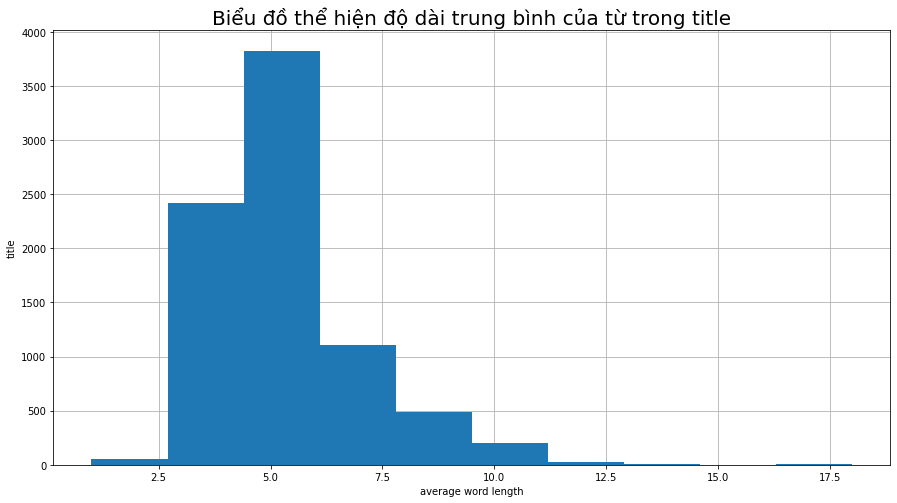

In [11]:
plt.figure(figsize=(15,8))
df['title'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

plt.title("Biểu đồ thể hiện độ dài trung bình của từ trong title",size=20)
plt.ylabel("title")
plt.xlabel("average word length")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text(0.5, 1.0, 'Bảng thể hiện số lượng stopwords xuất hiện thường xuyên trong title')

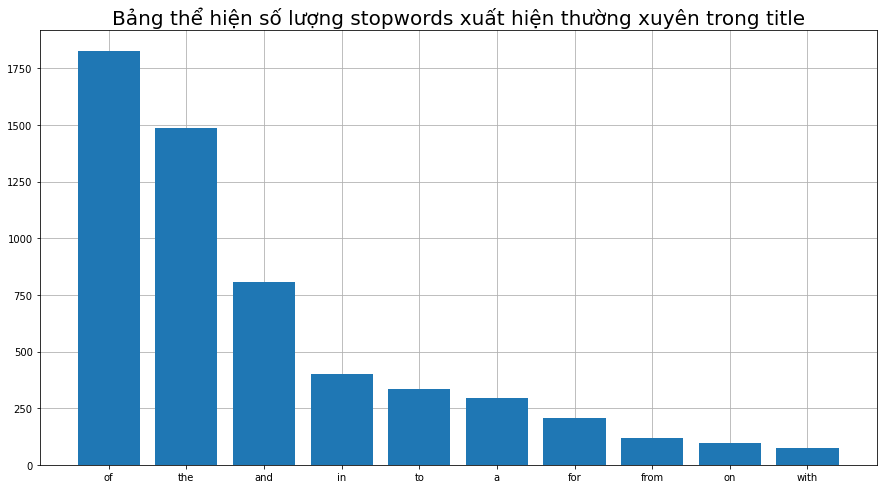

In [12]:
 import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    plt.figure(figsize=(15,8))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(df['title'])
plt.grid(True)
plt.title("Bảng thể hiện số lượng stopwords xuất hiện thường xuyên trong title",size=20)

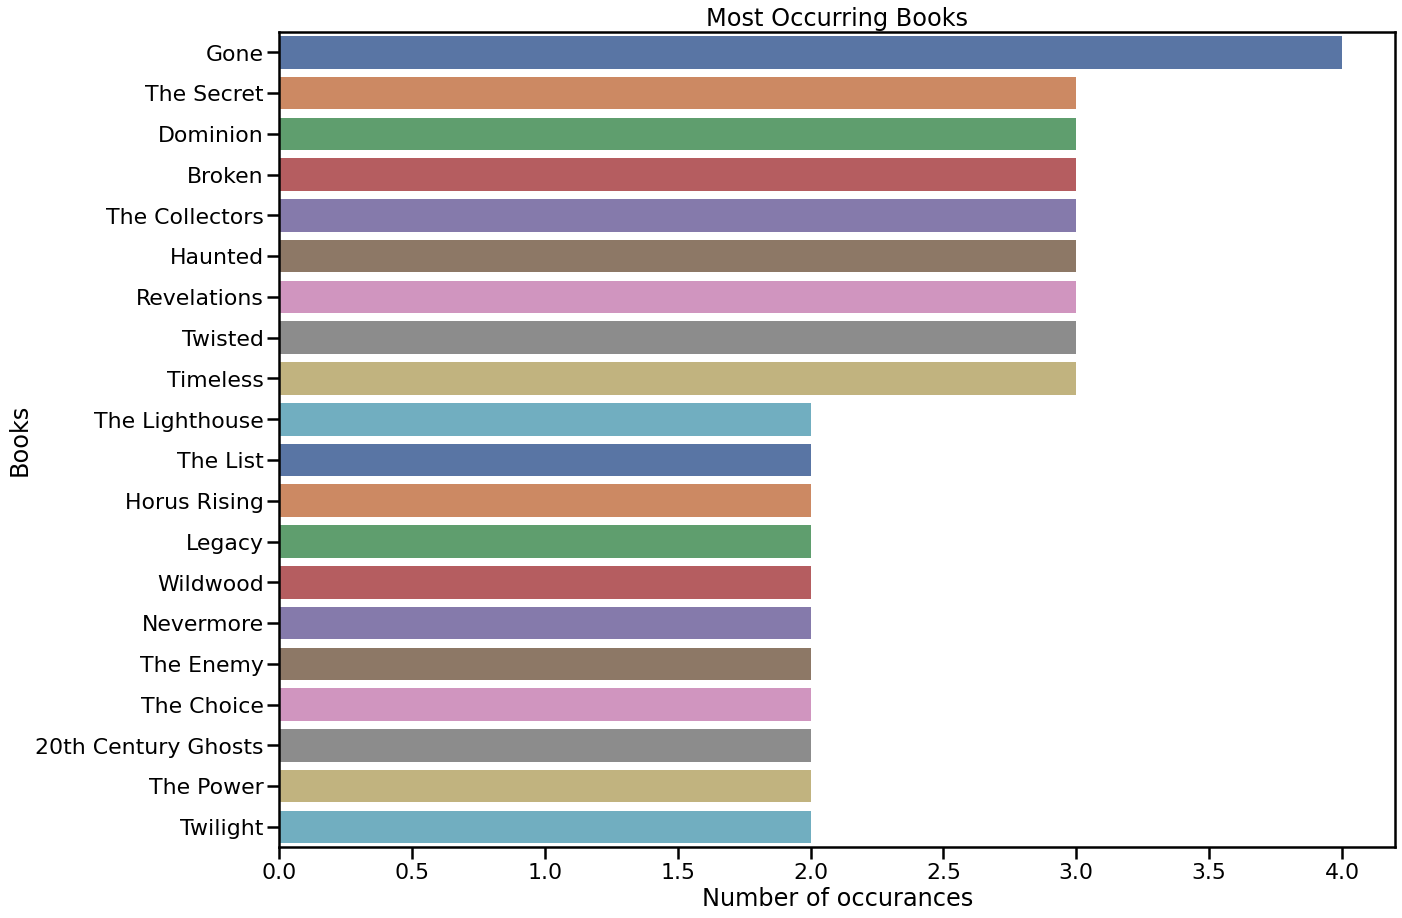

In [13]:
# Những cuốn sách có nhiều lần xuát hiện trong danh sách
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

-Có thể tháy là Gone là cuốn sách có số lần xuất hiện trùng tên nhiều nhât. Điều này có thể lý giải thích là do xuất bản nhiều lần, với nhiều ấn bản. Chứng tỏ những quyển sách này có tuổi đười đã lâu.

- Và có thể thấy là mỗi sách có mỗi một title riêng cho nên thuốc tính này không có tính phân loại và không thể đưa vào mô hình học máy.

## Series

In [14]:
df.groupby('series')['title'].count().reset_index().sort_values('title', ascending=False).set_index('series')[0:10] #Lấy ra top 10 series theo số lượng sách

,title
series,
Single,4579
Rogue Angel,43
Discworld,17
Argeneau,17
Skulduggery Pleasant,15
Big Finish Monthly Range,15
The Dresden Files,13
Otherworld,13
Psychic Eye Mystery,13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


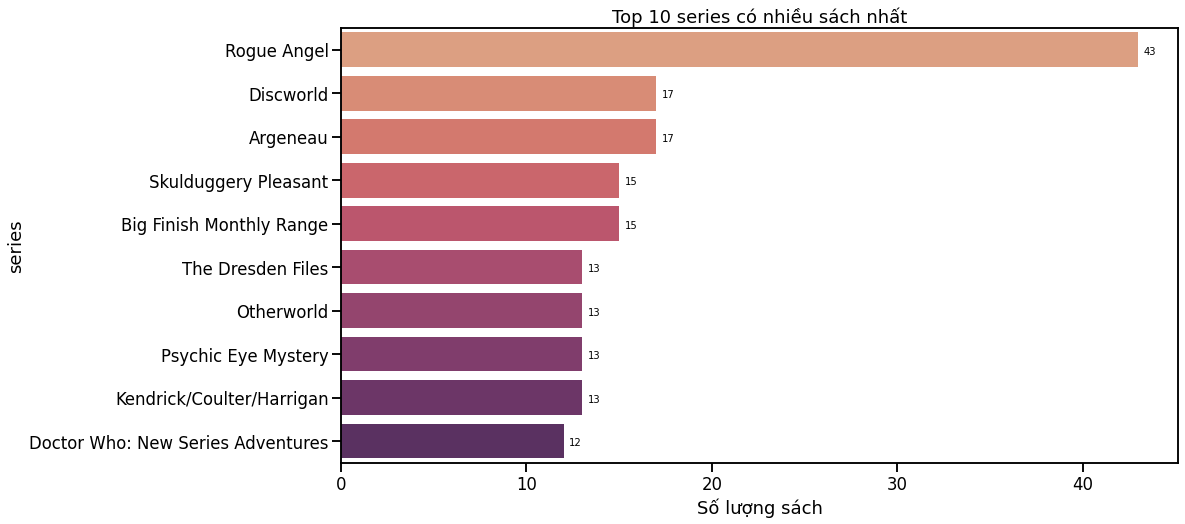

In [15]:
sns.set_context('talk')
most_series = df.groupby('series')['title'].count().reset_index().sort_values('title', ascending=False).set_index('series')[1:11]
plt.figure(figsize=(15,8))
ax = sns.barplot(most_series['title'],most_series.index, palette='flare')

ax.set_title("Top 10 series có nhiều sách nhất")
ax.set_xlabel("Số lượng sách")
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

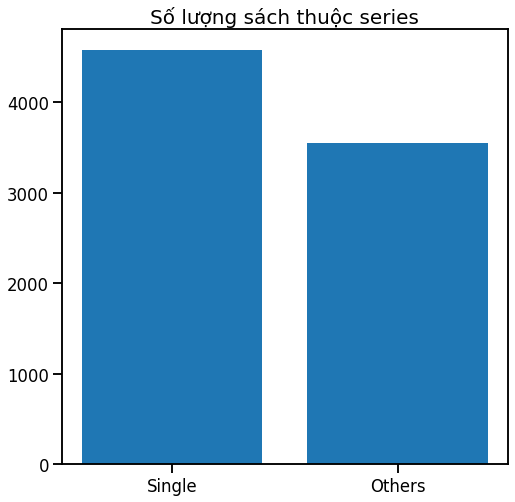

In [16]:
#Đếm số Single và không phải Single
series_count = {'Single':df[df['series']=='Single'].count()[0],
                'Others': df[df['series']!='Single'].count()[0]}
plt.figure(figsize=(8,8))
plt.bar(*zip(*series_count.items()))
plt.title('Số lượng sách thuộc series',size=20)
plt.show()

- Ta nhận thấy là tỷ lệ giữa single có sự chênh lệnh khoảng 1000 sách. Điều này rất có thể tạo ra sự khác nhau giữa rating của những cuốn sách.

In [17]:
series_count.values()

dict_values([4579, 3554])

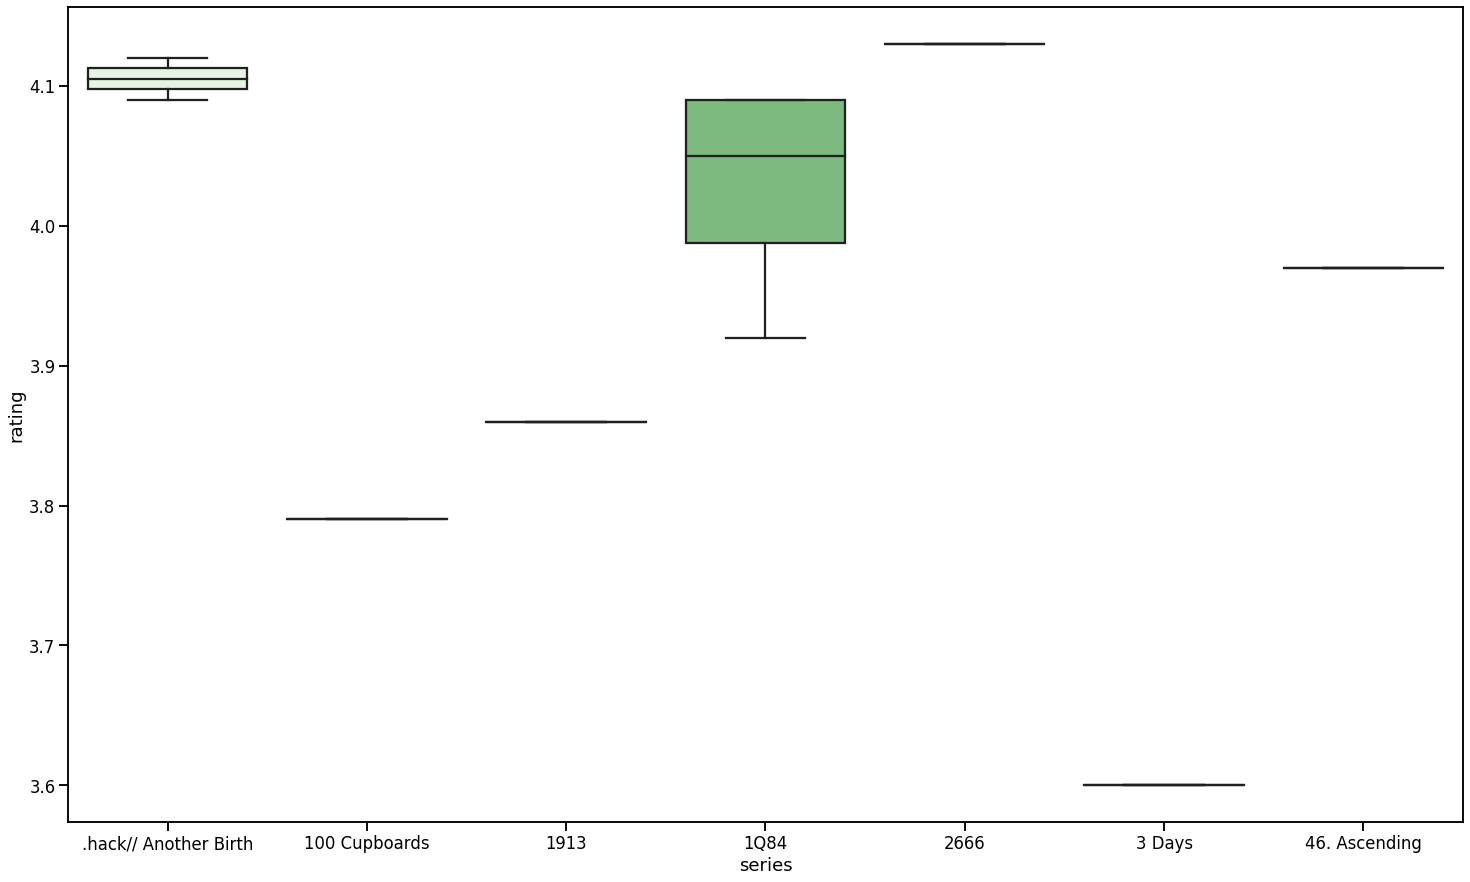

In [18]:
fig = plt.subplots(figsize=(25,15))
sns.boxplot(data=df.sort_values('series',ascending=True)[:11],x='series',y='rating',palette="Greens");

- Dựa vào boxplot Có thể thấy sự ảnh hưởn của Series sẽ ảnh hưởng đến rating.

## Author

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


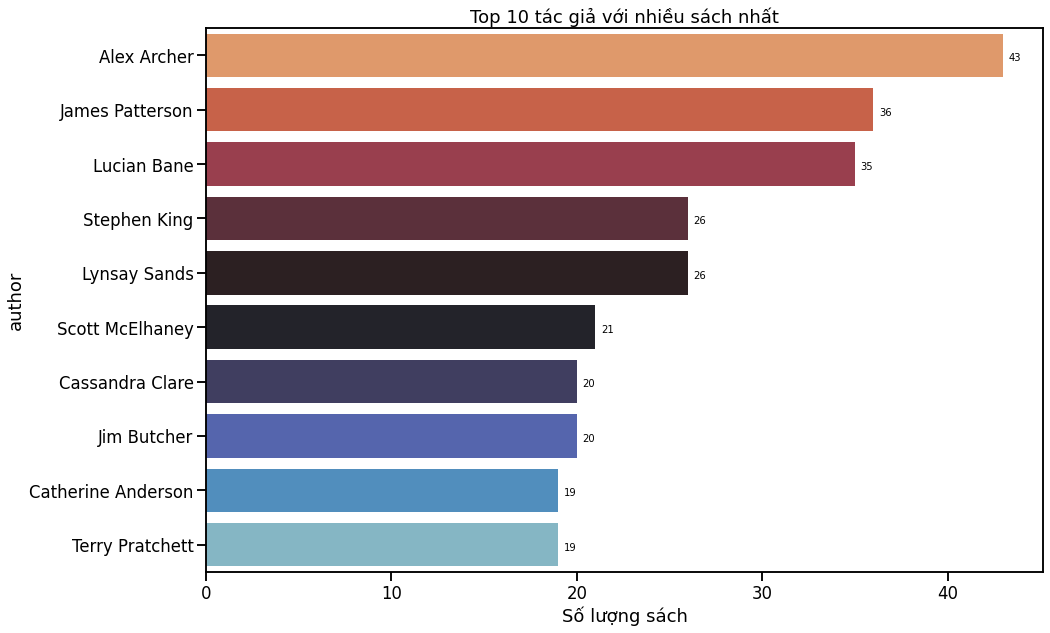

In [19]:
sns.set_context('talk')
most_books = df.groupby('author')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('author')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 tác giả với nhiều sách nhất")
ax.set_xlabel("Số lượng sách")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

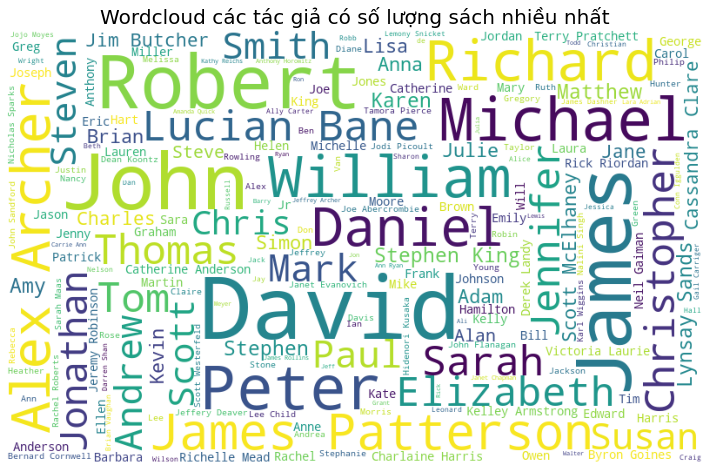

In [20]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

text_author = " ".join(author for author in df.author)
wc_author = WordCloud(width=800,height=500, max_font_size=100,background_color='white').generate(text_author)
fig=plt.figure(figsize=(16,8))
plt.axis('off')
plt.title('Wordcloud các tác giả có số lượng sách nhiều nhất',size=20)
plt.imshow(wc_author)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


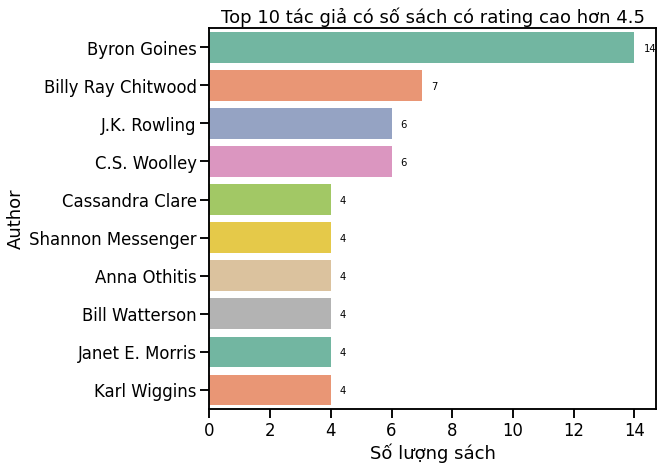

In [21]:
high_rated_author = df[df['rating']>=4.5]
high_rated_author = high_rated_author.groupby('author')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('author')
plt.figure(figsize=(8,7))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_title("Top 10 tác giả có số sách có rating cao hơn 4.5")
ax.set_xlabel("Số lượng sách")
ax.set_ylabel("Author")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


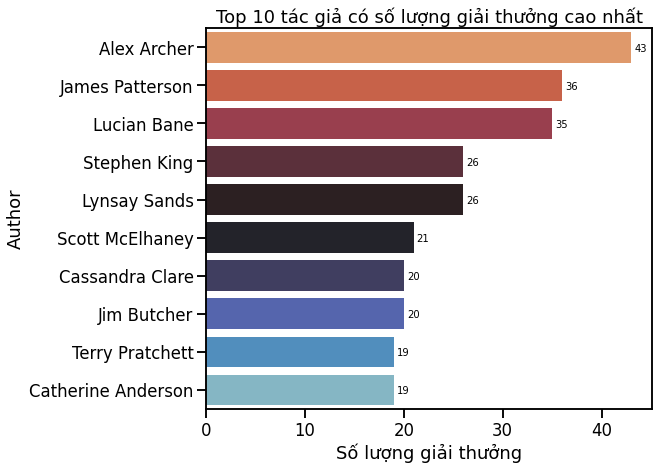

In [22]:
high_awards_author = df.copy()
high_awards_author = high_awards_author.groupby('author')['awards'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(8,7))
ax = sns.barplot(high_awards_author, high_awards_author.index, palette='icefire_r')
ax.set_title("Top 10 tác giả có số lượng giải thưởng cao nhất")
ax.set_xlabel("Số lượng giải thưởng")
ax.set_ylabel("Author")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

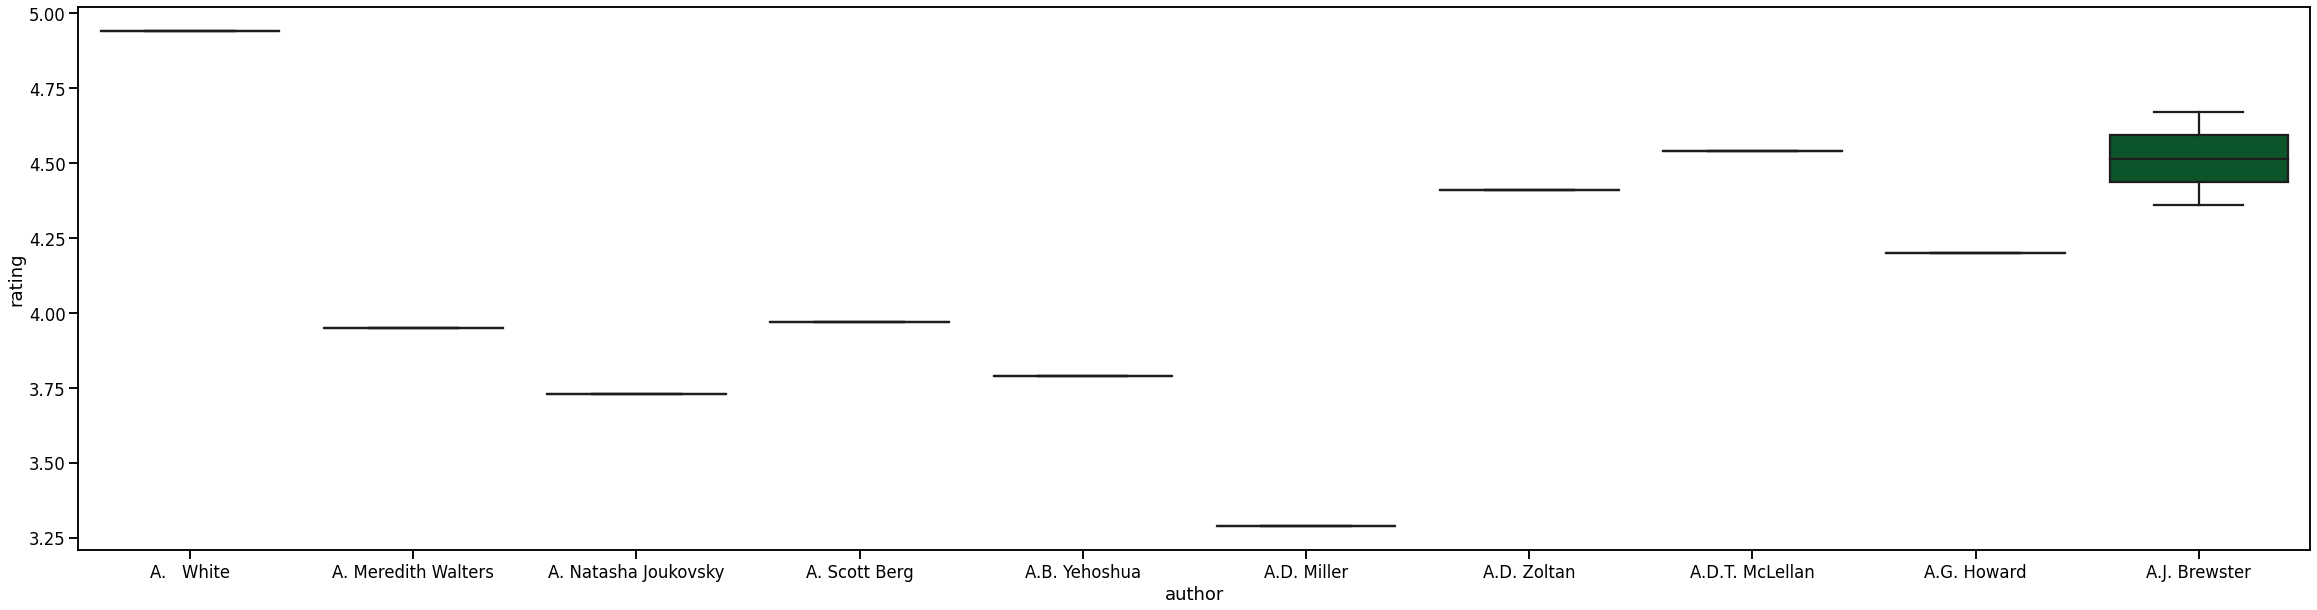

In [23]:
fig = plt.subplots(figsize=(40,10))
sns.boxplot(data=df.sort_values('author',ascending=True)[:11],x='author',y='rating',palette="Greens");

- Có thể thầy thì tác giá cũng ảnh hướng đến rating của quyển sách, mỗi người sẽ có một mức rating khác nhau.

## date_published	

In [24]:
date_pub=df['date_published'].value_counts().head(50).reset_index()
date_pub.columns=['year','count']
date_pub

,year,count
0,2012.0,727
1,2011.0,705
2,2013.0,658
3,2014.0,634
4,2010.0,627
5,2007.0,605
6,2006.0,578
7,2009.0,574
8,2008.0,504
9,2015.0,418


In [25]:
# Chỉ lấy các năm trong thế kỷ 21
date_pub=date_pub.iloc[:21,]
date_pub = date_pub.sort_values(["year", "count"], ascending=True)
date_pub['year']=date_pub['year'].map(str)
date_pub['year']=date_pub.year.str[:4]
date_pub

,year,count
19,2001,82
15,2002,194
13,2003,249
11,2004,314
10,2005,381
6,2006,578
5,2007,605
8,2008,504
7,2009,574
4,2010,627


Text(0.5, 1.0, 'Years of publishing')

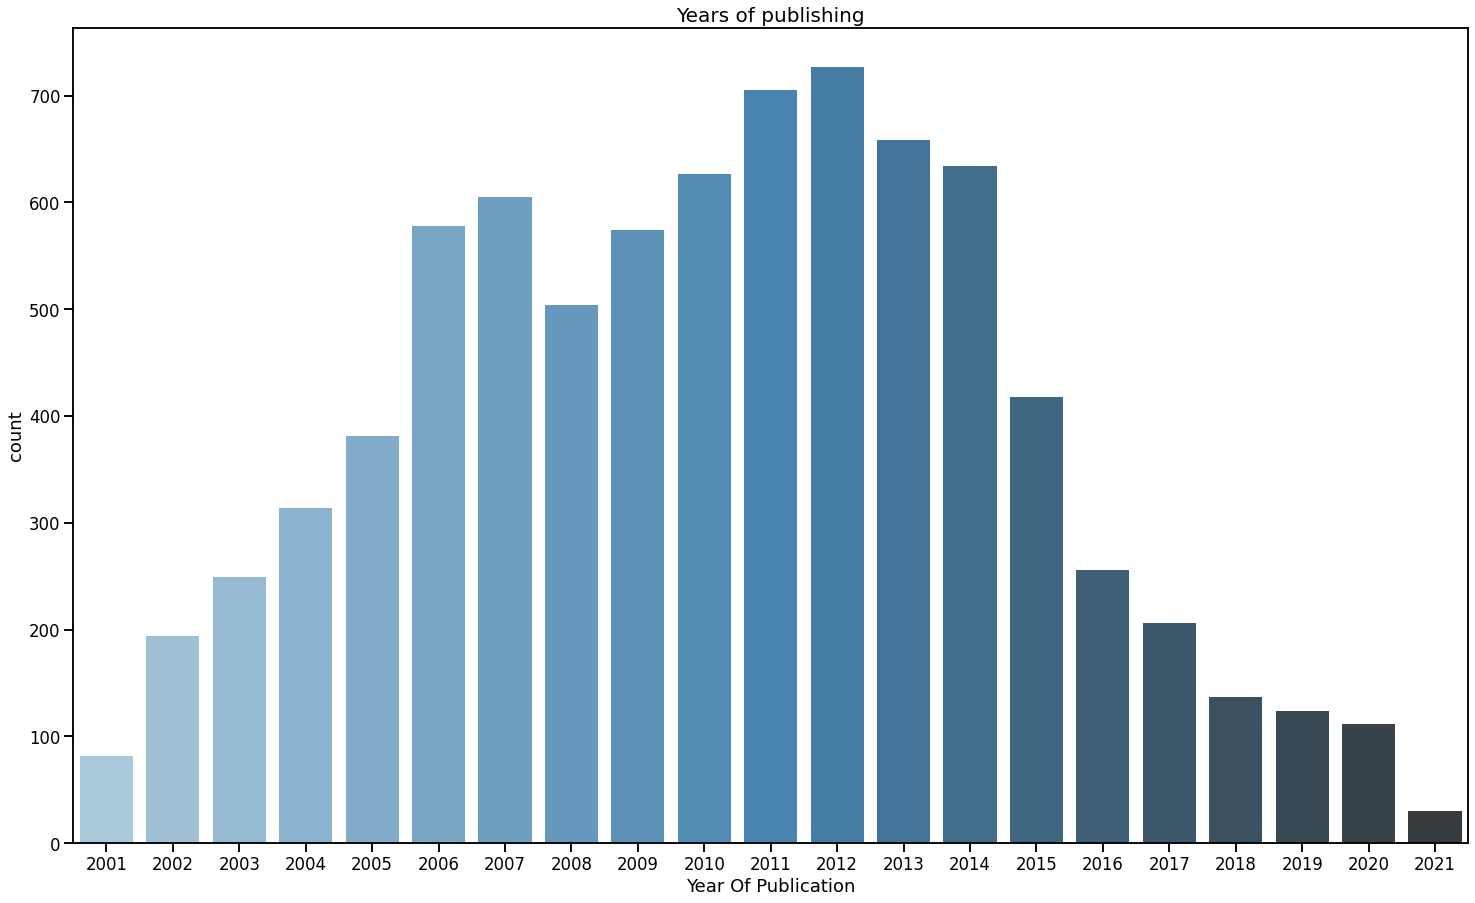

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,15))
sns.barplot(x='year',y='count',data=date_pub, palette="Blues_d")
plt.xlabel('Year Of Publication')
plt.title('Years of publishing',size=20)

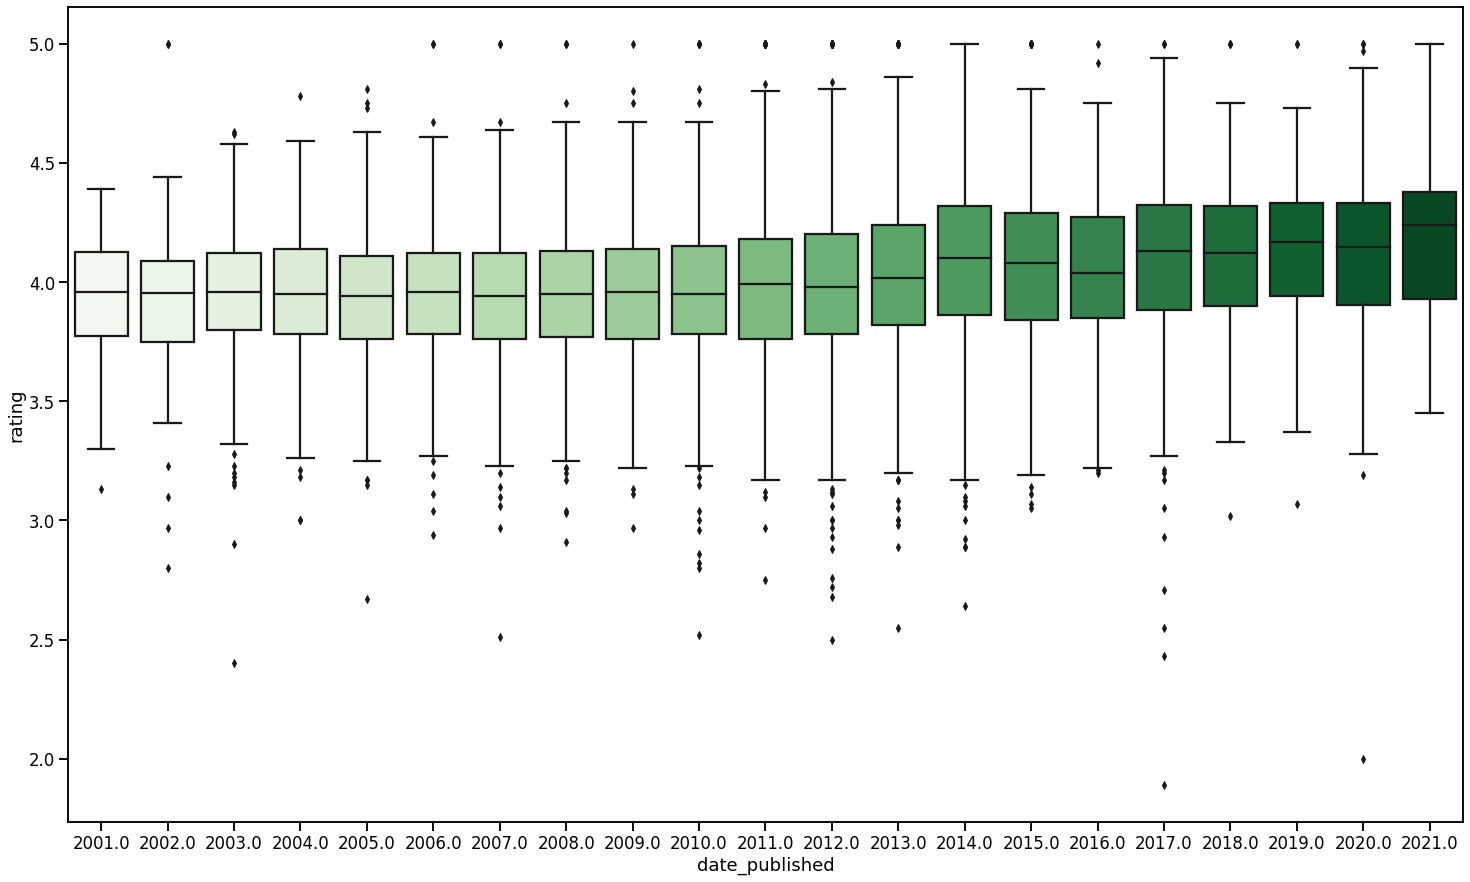

In [27]:
fig = plt.subplots(figsize=(25,15))
sns.boxplot(data=df[df['date_published']>=2001],x='date_published',y='rating',palette="Greens");

- Nhìn vào boxplot thì chúng ta có thể thấy là hình dạng của các hộp nến ít thay đôi cho thấy thuộc tính này không ảnh hưởng nhiều đến kết quả rating.

## Publisher

In [28]:
#Lấy ra top 10 publisher theo số sách
df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).set_index('publisher')[0:11] 

,title
publisher,
HarperCollins,91
Random House,87
[' '],80
Grand Central Publishing,79
Vintage,79
St. Martin's Press,78
Ballantine Books,77
Knopf,73
"Little, Brown and Company",73


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


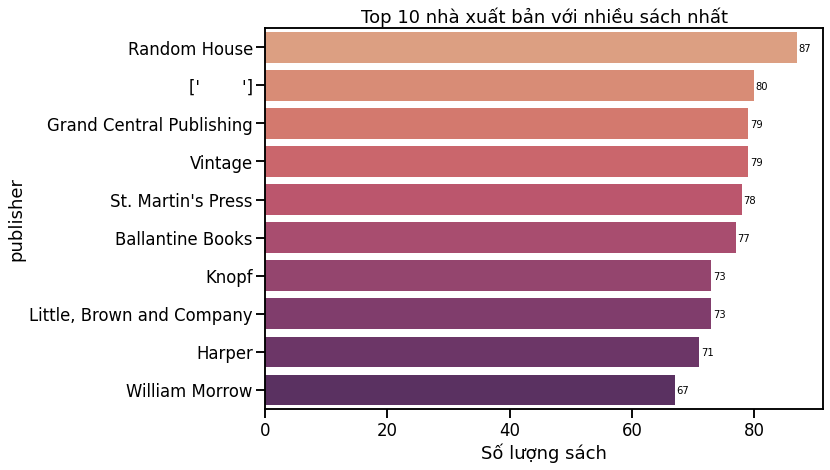

In [29]:
sns.set_context('talk')
most_publisher = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).set_index('publisher')[1:11]
plt.figure(figsize=(10,7))
ax = sns.barplot(most_publisher['title'], most_publisher.index, palette='flare')
ax.set_title("Top 10 nhà xuất bản với nhiều sách nhất")
ax.set_xlabel("Số lượng sách")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [30]:
#Rating trung bình của top publisher
df_subset = df[df['publisher'].isin(most_publisher.reset_index()['publisher'].tolist())]
df_subset = df_subset[df_subset['date_published'].isin([2003,2004,2005,2006,2007,2008,2009,2010,2011])]
df_subset = df_subset.groupby(["publisher","date_published"]).agg({"rating":np.mean}).reset_index()
df_subset = df_subset.pivot("publisher", "date_published", "rating")
df_subset

date_published,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0
publisher,,,,,,,,,
Ballantine Books,3.916667,3.750000,3.852500,3.806429,3.768889,4.005000,3.760000,3.720000,4.015000
Grand Central Publishing,3.850000,3.835000,3.916667,3.870000,4.065556,3.952500,4.088000,3.978889,4.014444
Harper,NaN,NaN,NaN,3.834444,3.960000,3.972500,3.766667,3.732500,3.895556
Knopf,3.990000,NaN,NaN,3.944000,3.973333,3.943333,3.982500,3.740000,3.741111
"Little, Brown and Company",NaN,3.880000,3.896667,3.761667,3.991250,3.945556,3.875000,3.752000,3.770000
Random House,3.450000,3.813333,4.095000,3.970000,3.790000,3.791111,3.901111,3.936667,3.877778
St. Martin's Press,4.140000,3.995000,4.130000,3.990000,3.901667,3.920000,3.868000,3.932500,4.015000
Vintage,3.742000,3.887143,3.881538,3.899286,3.864000,3.860000,3.663333,3.960000,3.890000
William Morrow,4.010000,3.850000,3.670000,3.802500,3.865000,3.975000,3.834286,3.892500,3.864000


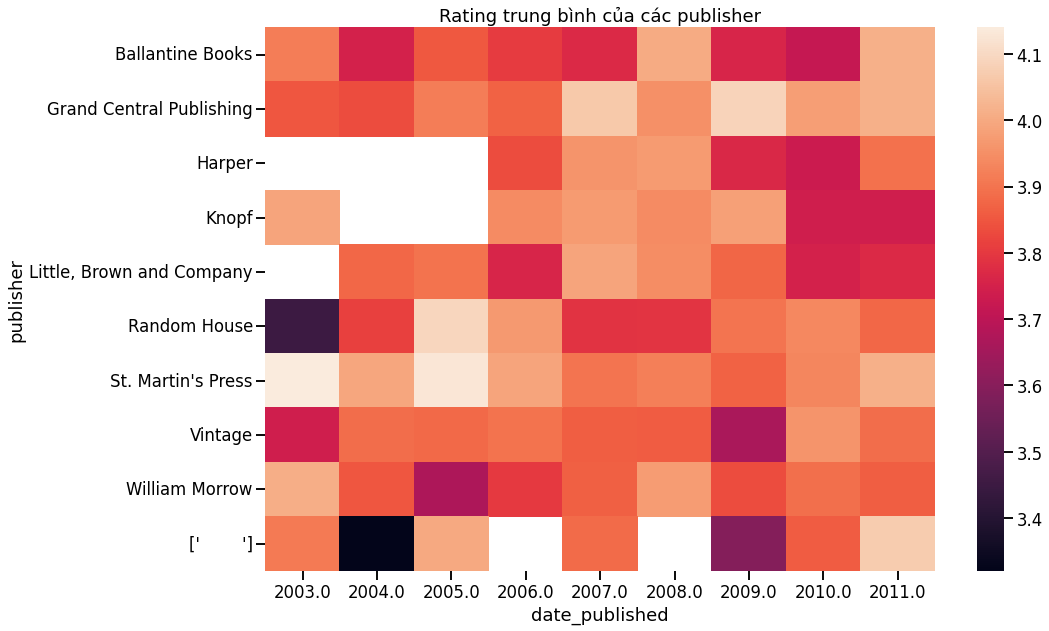

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.heatmap(ax=ax,data=df_subset).set_title('Rating trung bình của các publisher')

## Genre

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


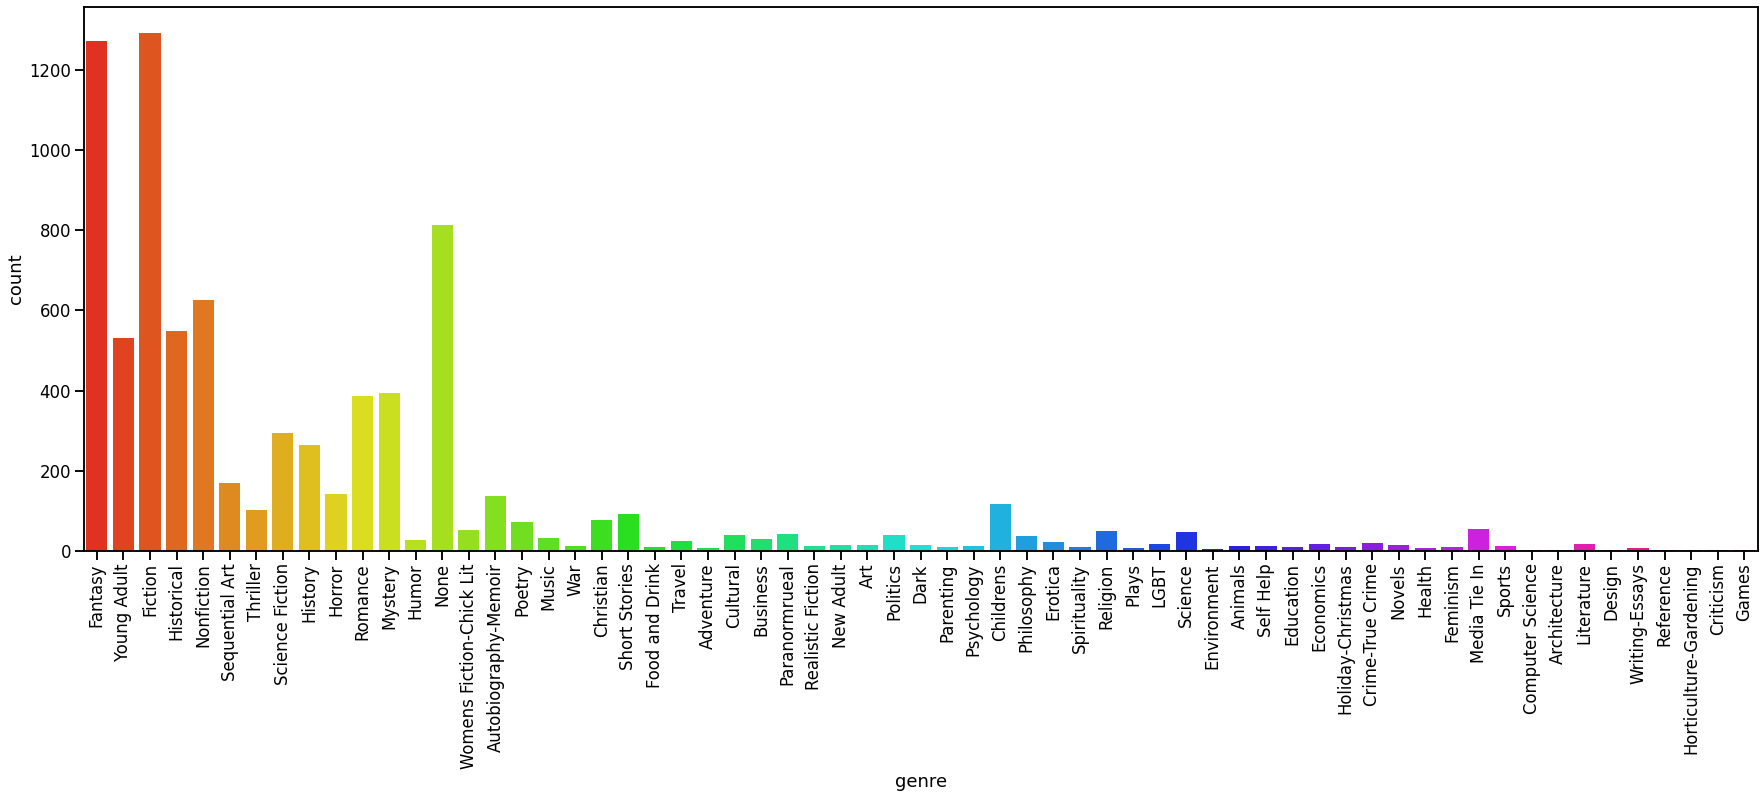

In [32]:
plt.figure(figsize = (30,10))
plt.xticks(rotation='vertical')
sns.countplot(df['genre'], palette = 'hsv')

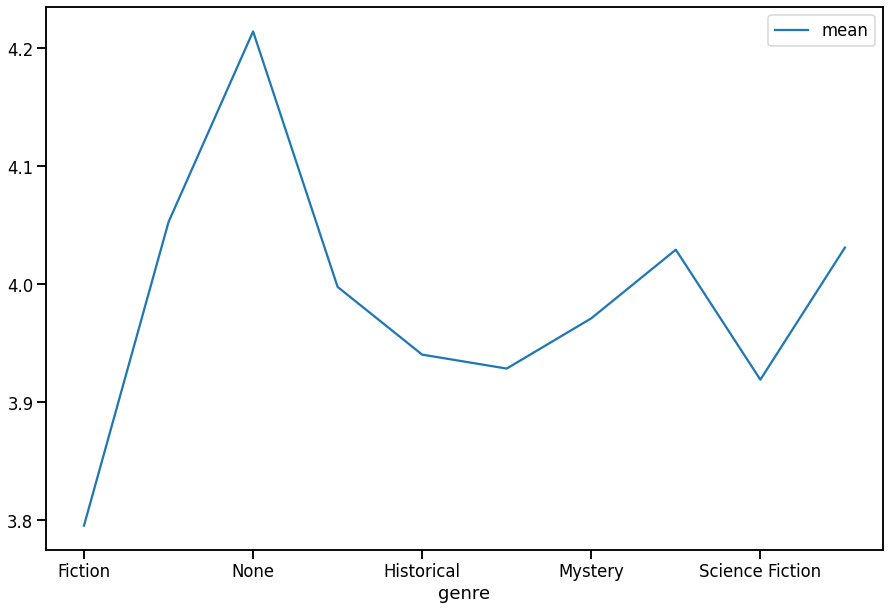

In [33]:
df.groupby('genre')['title'].count().reset_index().sort_values('title', ascending=False).set_index('genre')
most_genre = df.groupby('genre')['title'].count().reset_index().sort_values('title', ascending=False).set_index('genre')[0:10]
genre_rating = {}
for genre in most_genre.index:
  tmp = df.loc[df['genre']==genre]
  mean = np.mean(tmp['rating'].values)
  genre_rating[genre] = mean
a=pd.DataFrame(
    {
    'genre': genre_rating.keys(),
    'mean': genre_rating.values()
    }
)
a=a.set_index('genre')
a.plot(kind='line',figsize=(15,10))

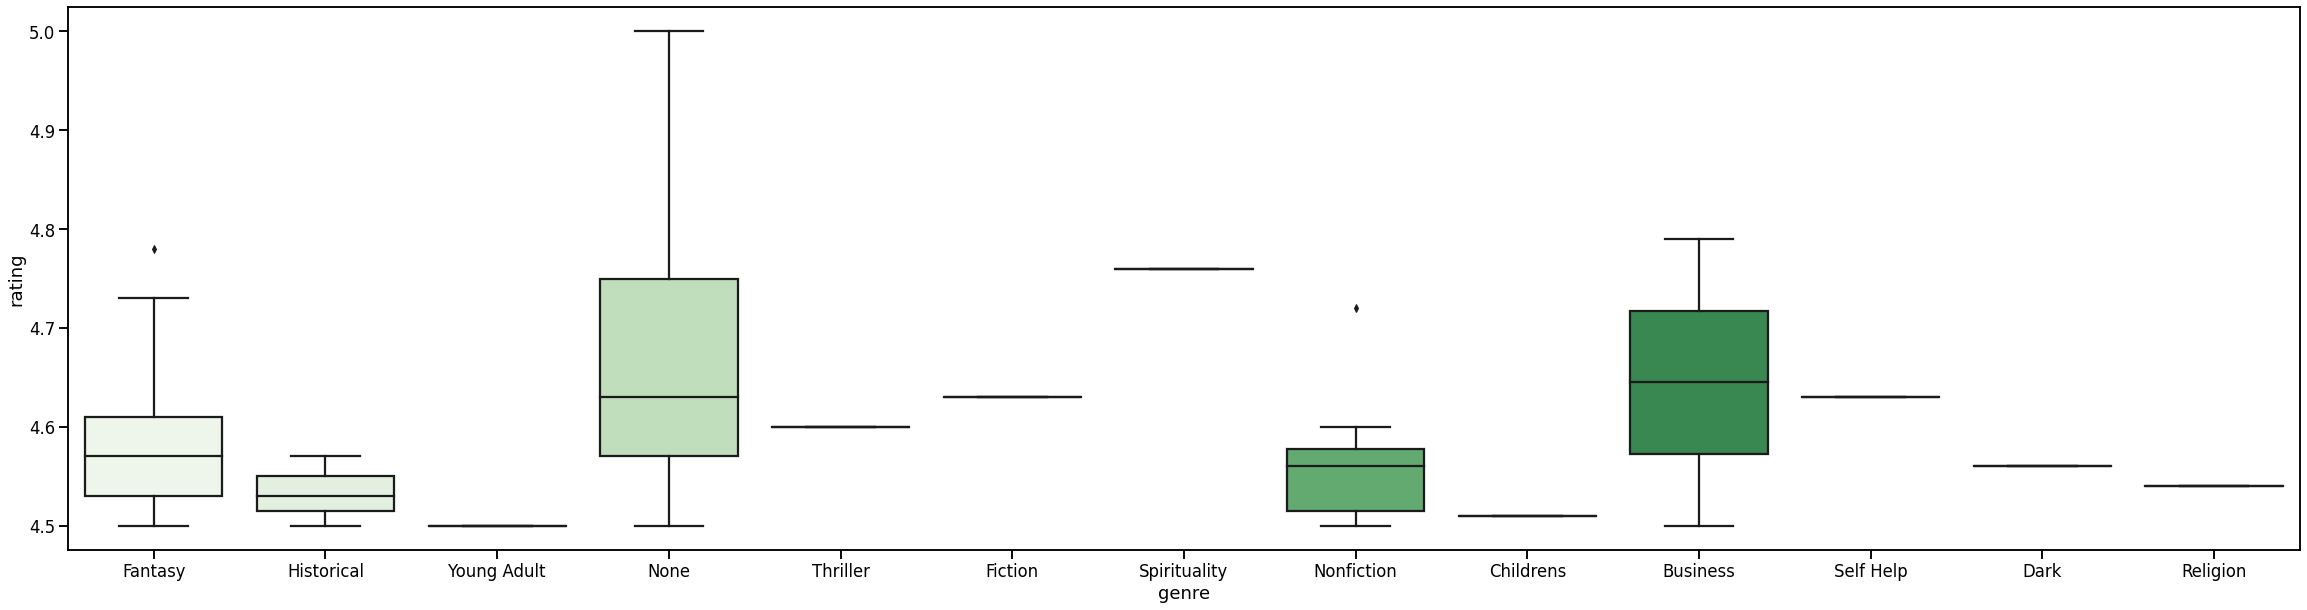

In [34]:
# top những thể loại có rating cao hơn 4.5 
fig = plt.subplots(figsize=(40,10))
sns.boxplot(data=df[df['rating']>=4.5][:100],x='genre',y='rating',palette="Greens");

- Có thể thấy thì genre là thuộc tính có ảnh hưởng đến rating nhiều nhất. Vì độ dài là vị trí hình của các hộp nến rất khác nhau.


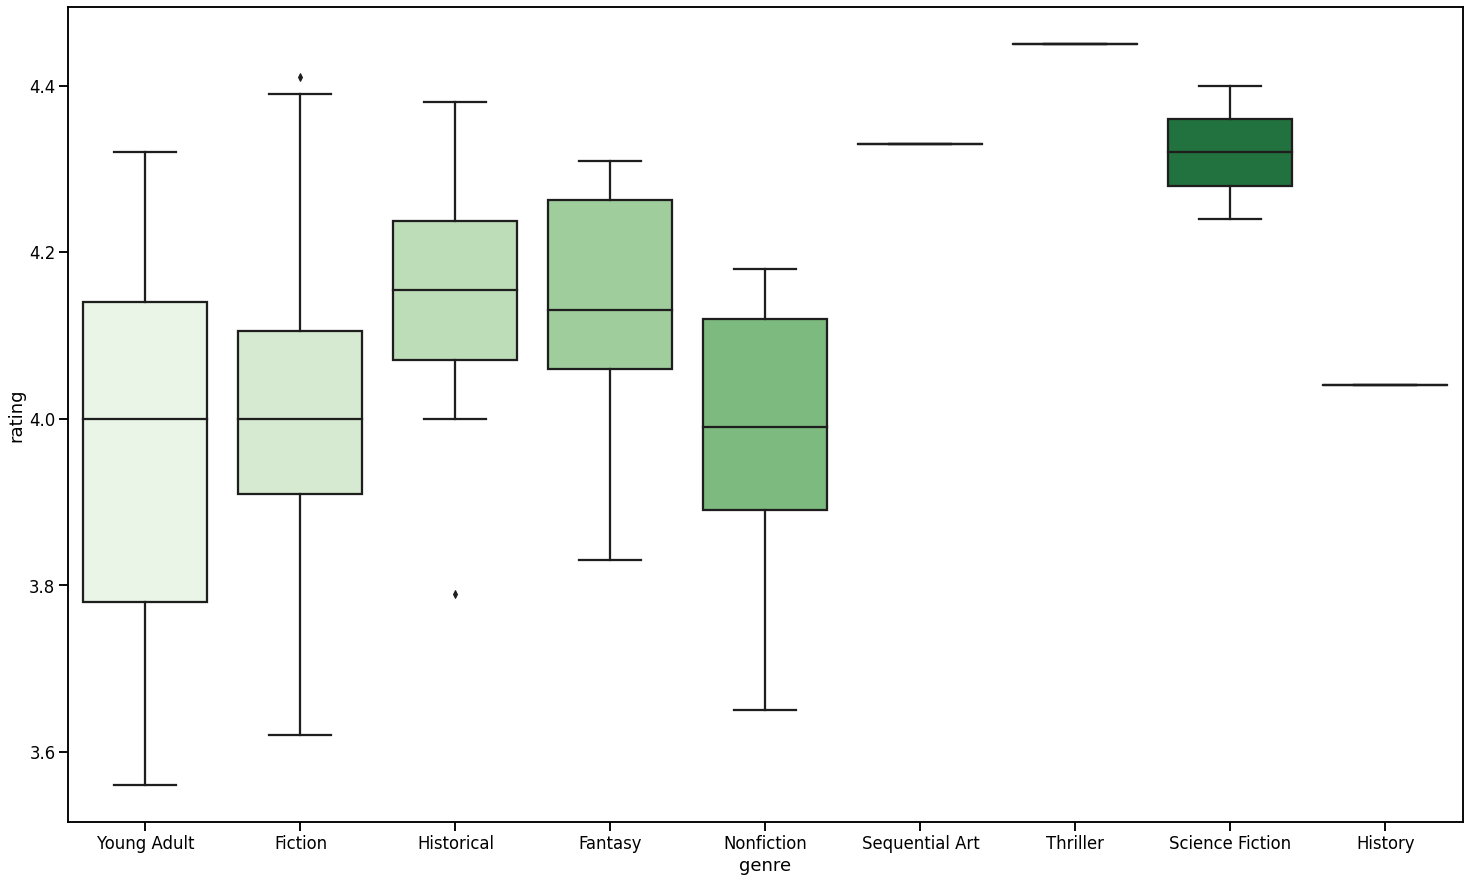

In [35]:
fig = plt.subplots(figsize=(25,15))
sns.boxplot(data=df[df['rating']<4.5][:100],x='genre',y='rating',palette="Greens");

- Có thể thấy là những sách có nội dung Young Adult thì thường có rating thấp.

## ISNB

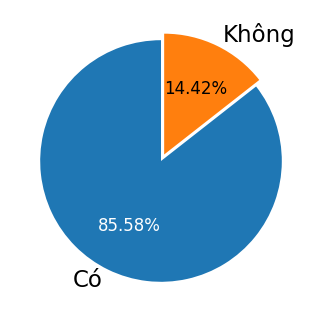

In [36]:
values = df['isbn'].value_counts()
labels = ['Có', 'Không']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = False,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

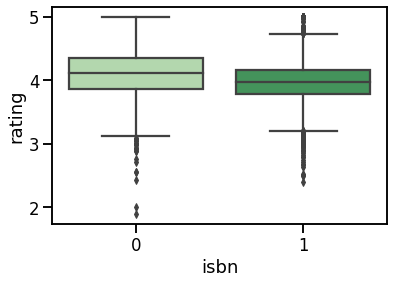

In [37]:
sns.boxplot(data=df,x='isbn',y='rating',palette="Greens");

- Sách có hay không có mã vạch thì hầu như khong có sự khác biệt rõ rệt trong hình dạng hộp nến => Không ảnh hưởng đến kết quả rating.

# 2. Phân tích các biến liên tục.

## Độ tương quan giữa các thuộc tính.

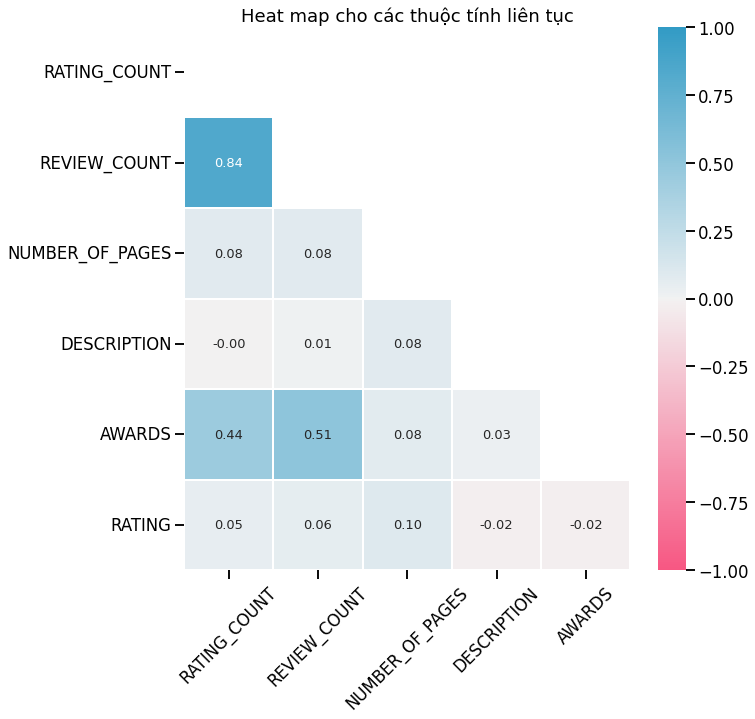

In [38]:
corr=df[['rating_count','review_count','number_of_pages','description','awards','rating']]
corr=corr.corr()
corr

ones_corr= np.ones_like(corr,dtype=bool)
ones_corr

# np's triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

adjusted_mask =mask[0:,:-1]
adjusted_mask.shape

adjusted_corr=corr.iloc[0:,:-1]

fig,ax = plt.subplots(figsize=(10,10))
# Sử dụng hàm để tạo thang màu riêng

cmap=sns.diverging_palette(0,230,90,60,
    as_cmap=True)

sns.heatmap(data=adjusted_corr,cmap=cmap,color='white',linewidths=1,
           mask=adjusted_mask,annot=True,annot_kws={"fontsize":13},
           fmt=".2f",vmin=-1,vmax=1)
ytick =[i.upper() for i in adjusted_corr.index]
xick =[i.upper() for i in adjusted_corr.columns]

ax.set_yticklabels(ytick, rotation =0);
ax.set_xticklabels(xick, rotation =45);
ax.set_title("Heat map cho các thuộc tính liên tục",fontsize=18);

- Có thế thầy là độ tương quan giữa rating và các thuộc tính còn lại ở mức rất thấp, hầu như không có ảnh hưởng gì nhiều đến rating.

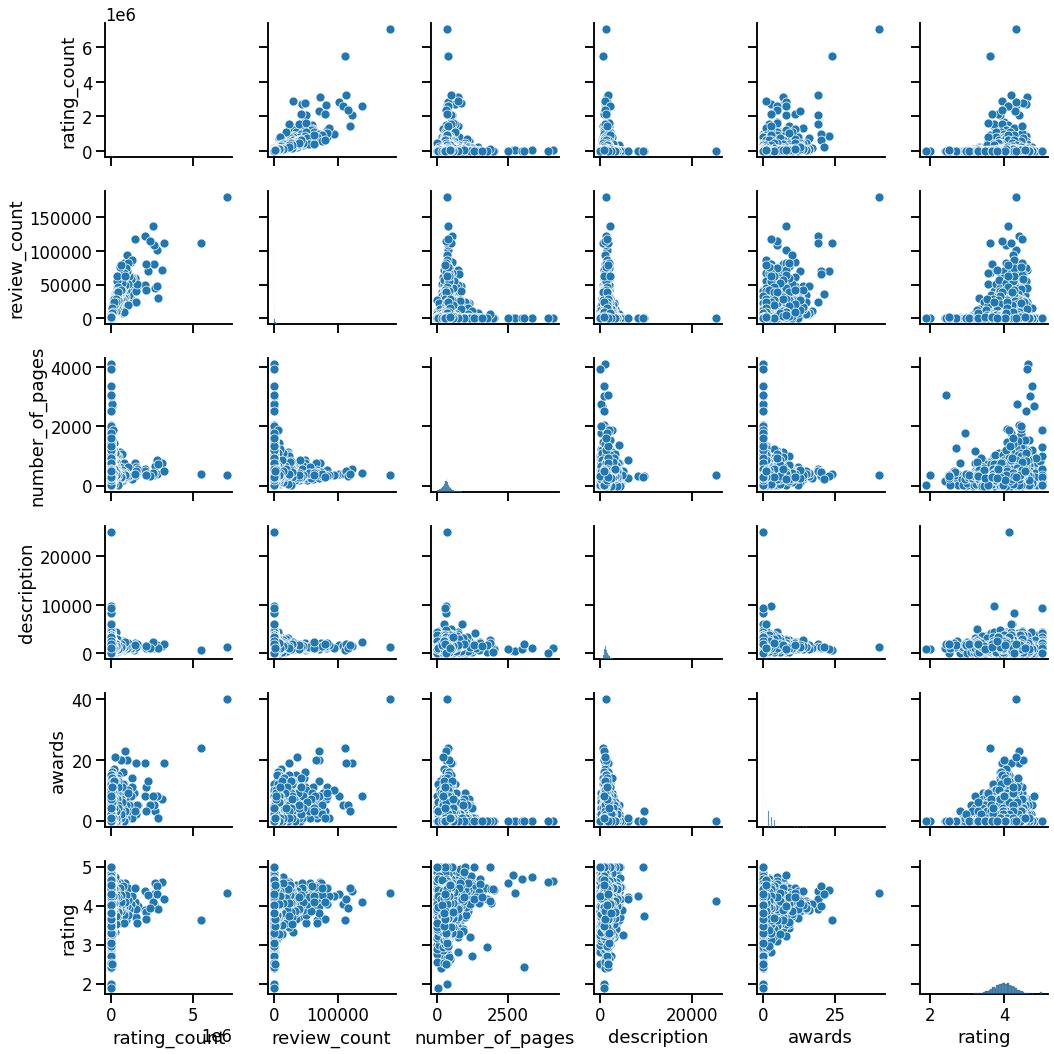

In [39]:
sns.pairplot(df[['rating_count','review_count','number_of_pages','description','awards','rating']])

In [40]:
df.describe()

,id,rating_count,review_count,number_of_pages,date_published,isbn,description,awards,rating
count,8.133000e+03,8.133000e+03,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000,8133.000000
mean,1.173491e+07,4.584464e+04,2936.032583,351.379850,2010.189967,0.855773,1385.525022,1.048691,3.989882
std,1.188935e+07,1.858173e+05,8396.871875,198.330886,4.422663,0.351342,659.160920,2.088980,0.331083
min,1.000000e+00,1.000000e+00,0.000000,0.000000,1972.000000,0.000000,0.000000,0.000000,1.890000
25%,9.565920e+05,5.710000e+02,61.000000,256.000000,2007.000000,1.000000,1052.000000,0.000000,3.790000
50%,8.563789e+06,5.441000e+03,472.000000,336.000000,2010.000000,1.000000,1311.000000,0.000000,3.990000
75%,1.814409e+07,2.818400e+04,2094.000000,415.000000,2013.000000,1.000000,1654.000000,1.000000,4.190000
max,5.900850e+07,7.026399e+06,179928.000000,4081.000000,2021.000000,1.000000,25116.000000,40.000000,5.000000


In [41]:
# corelation, p_value
from scipy.stats.stats import pearsonr
rating_count_corr = pearsonr(df['rating_count'],df['rating'])
review_count_corr = pearsonr(df['review_count'],df['rating'])
number_of_pages_corr = pearsonr(df['number_of_pages'],df['rating'])
date_published_corr = pearsonr(df['date_published'],df['rating'])
isbn_corr = pearsonr(df['isbn'],df['rating'])
description_corr = pearsonr(df['description'],df['rating'])
awards_corr = pearsonr(df['awards'],df['rating'])

correlation_table = pd.DataFrame([['rating_count'] + list(rating_count_corr),
                ['review_count'] + list(review_count_corr),
                ['number_of_pages'] + list(number_of_pages_corr),
                ['date_published'] + list(date_published_corr),
                ['description'] + list(isbn_corr),
                ['isbn'] + list(description_corr),
                ['awards'] + list(awards_corr)], 
                columns=['Feature', 'correlation', 'p_value'])
print(correlation_table)

           Feature  correlation       p_value
0     rating_count     0.047102  2.142583e-05
1     review_count     0.055087  6.664730e-07
2  number_of_pages     0.100141  1.398955e-19
3   date_published     0.156071  1.627937e-45
4      description    -0.138675  3.288499e-36
5             isbn    -0.016560  1.353555e-01
6           awards    -0.017322  1.182839e-01


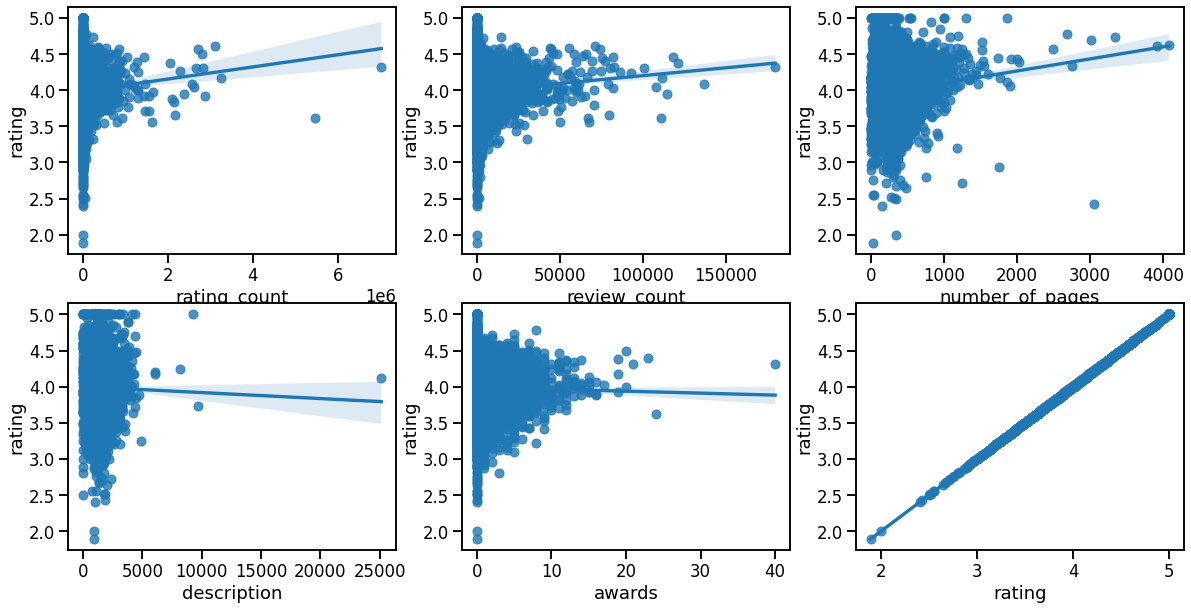

In [42]:
a=['rating_count','review_count','number_of_pages','description','awards','rating']
fig = plt.subplots(figsize=(20,10))
for i in range(len(a)):
    plt.subplot(2,3,1+i);
    sns.regplot(x=a[i],y='rating',data=df);

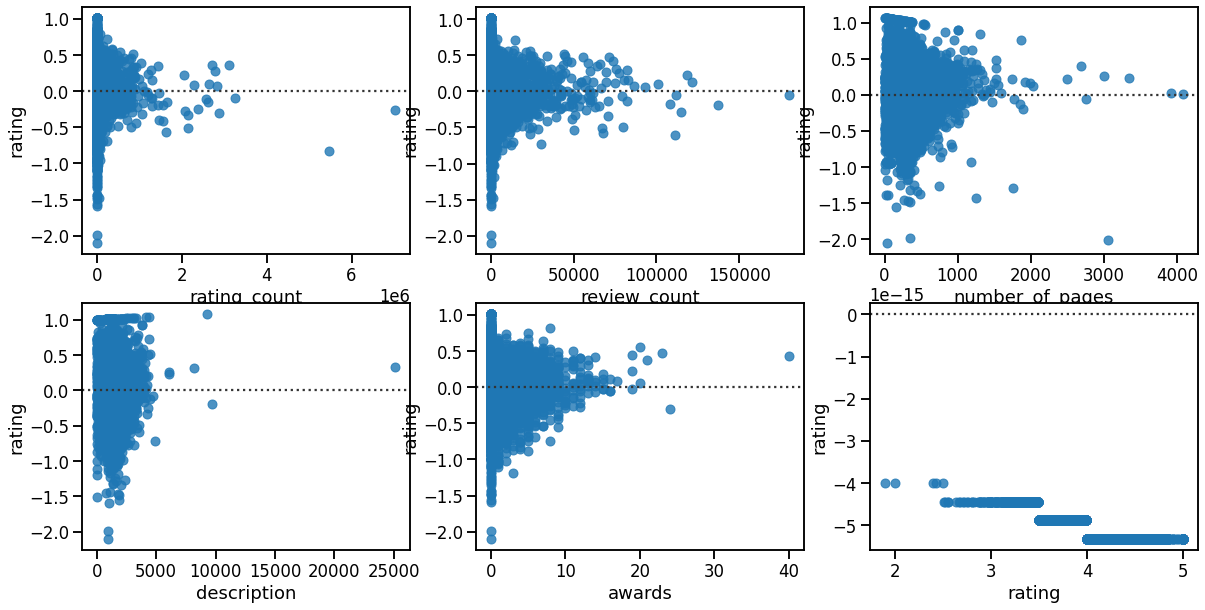

In [43]:
fig = plt.subplots(figsize=(20,10))
for i in range(len(a)):
    plt.subplot(2,3,1+i);
    sns.residplot(x=a[i],y='rating',data=df);

## Rating_count

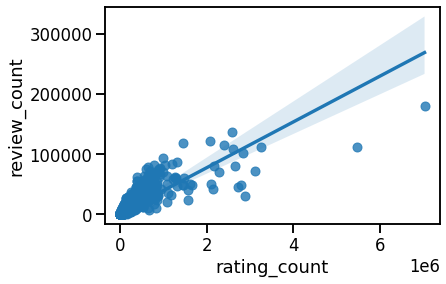

In [44]:
sns.regplot(data=df,x='rating_count',y='review_count');

- Đây là 2 thuộc tính có mối tỷ số tương quan cao nhất. Nằm ở mức 0.84

## review_count.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


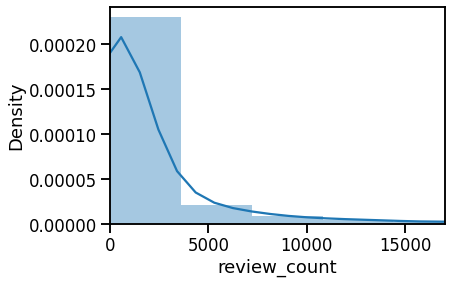

In [45]:
sns.distplot(df['review_count'])
plt.xlim(0,17000)
plt.show()

## number_of_pages.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


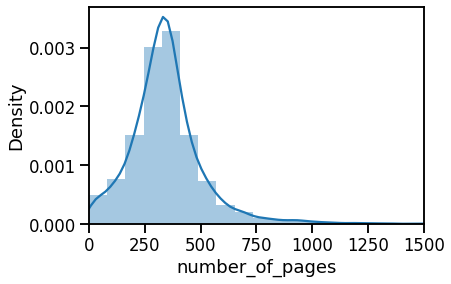

In [46]:
sns.distplot(df['number_of_pages'])
plt.xlim(0,1500)
plt.show()

In [47]:
#ThỐNG kÊ số sách theo từng khoảng trang
df_statistic = df.copy()
df_statistic['num_page'] = np.select(
    [
        df['number_of_pages'].between(0, 249, inclusive=True), 
        df['number_of_pages'].between(250, 499, inclusive=True),
        df['number_of_pages'].between(500, 749, inclusive=True),
        df['number_of_pages'].between(750, 999, inclusive=True),
        df['number_of_pages']>=1000    
    ], 
    [
        '<250', 
        '250-499',
        '500-749',
        '750-999',
        '>=1000'
    ], 
    default='Unknown'
)
b=df_statistic.groupby('num_page').count()
b['num_page']=list(b.index)
b

,id,title,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre,isbn,description,awards,rating,num_page
num_page,,,,,,,,,,,,,,,
250-499,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209,5209,250-499
500-749,782,782,782,782,782,782,782,782,782,782,782,782,782,782,500-749
750-999,148,148,148,148,148,148,148,148,148,148,148,148,148,148,750-999
<250,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,<250
>=1000,86,86,86,86,86,86,86,86,86,86,86,86,86,86,>=1000


In [48]:
import plotly.express as px
plt.figure(figsize = (18,8))
page_250 = df[(df['number_of_pages'] <= 249) ]
page_250_499 = df[(df['number_of_pages'] >= 250) & (df['number_of_pages'] <= 499)]
page_500_749 = df[(df['number_of_pages'] >= 500) & (df['number_of_pages'] <= 749)]
page_750_999 = df[(df['number_of_pages'] >= 750) & (df['number_of_pages'] <= 999)]
page_10000above = df[df['number_of_pages']>= 1000]
x_age = ['250-', '250-499', '500-749', '750-999', '1000+']
y_age = [page_250['rating'].mean(), page_250_499['rating'].mean(), page_500_749['rating'].mean(), page_750_999['rating'].mean(),
     page_10000above['rating'].mean()]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Rating of book per page group')

<Figure size 1296x576 with 0 Axes>

- Dựa vào biểu độ his thì có thể thấy sự chệnh lệch tuong đôi ít của số trang đến rating.

In [49]:
page_250['rating'].mean()

4.010780922431868

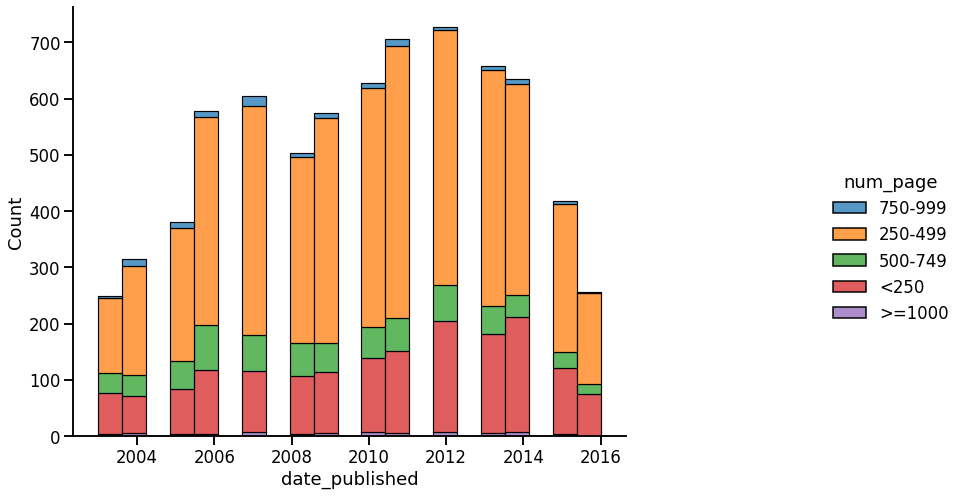

In [50]:
g=sns.displot(df_statistic[df_statistic['date_published'].between(2003,2016)], x="date_published", hue="num_page", multiple="stack")
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

In [51]:
def Sotrang(text):
  
  if text <= 249: # Kiểm tra giá trị null
    return 1
  if text >250 and text <= 500:
    return 2
  if text > 500 and text <= 750:
    return 3
  if text > 750 and text <= 999:
    return 4
  if text > 1000:
    return 5


In [52]:
df['number_of_pages']=df['number_of_pages'].apply(Sotrang)

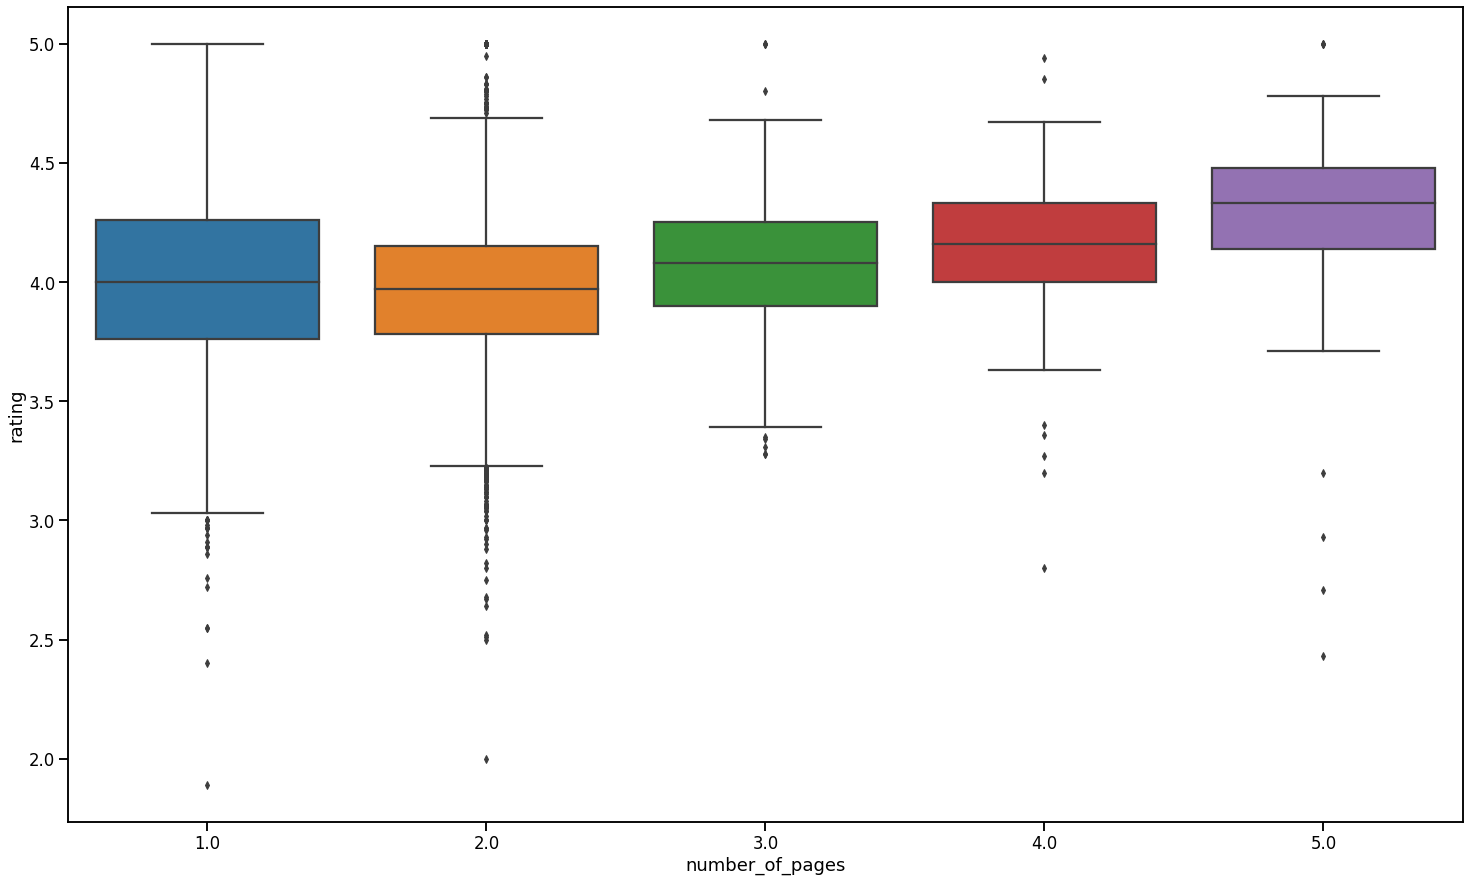

In [53]:
fig = plt.subplots(figsize=(25,15))
sns.boxplot(data=df.sort_values('number_of_pages'),x='number_of_pages',y='rating')

- Quan sát tổng quát thì có thể thấy các hộp hầu như thay đổi rất ít, Nhưng quan sát đầu và cuối vẫn thấy sự chênh lệch => VÌ thế có thể sử dụng được thuộc tính này.

## Description

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



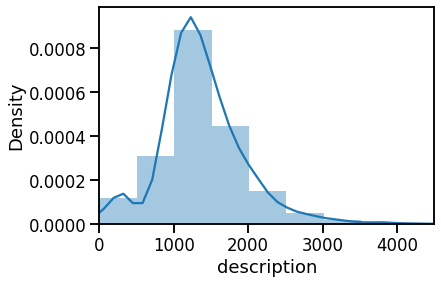

In [54]:
sns.distplot(df['description'])
plt.xlim(0,4500)
plt.show()

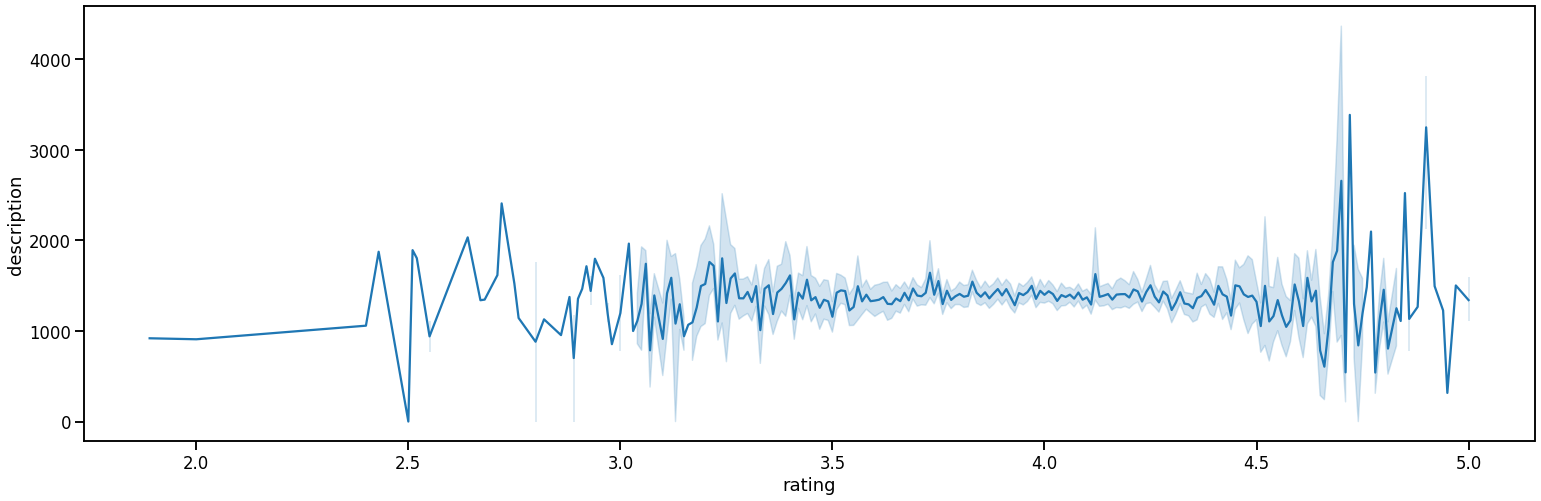

In [55]:
fig = plt.gcf()
fig.set_size_inches(26, 8)
sns.lineplot(x="rating", y="description", data=df)

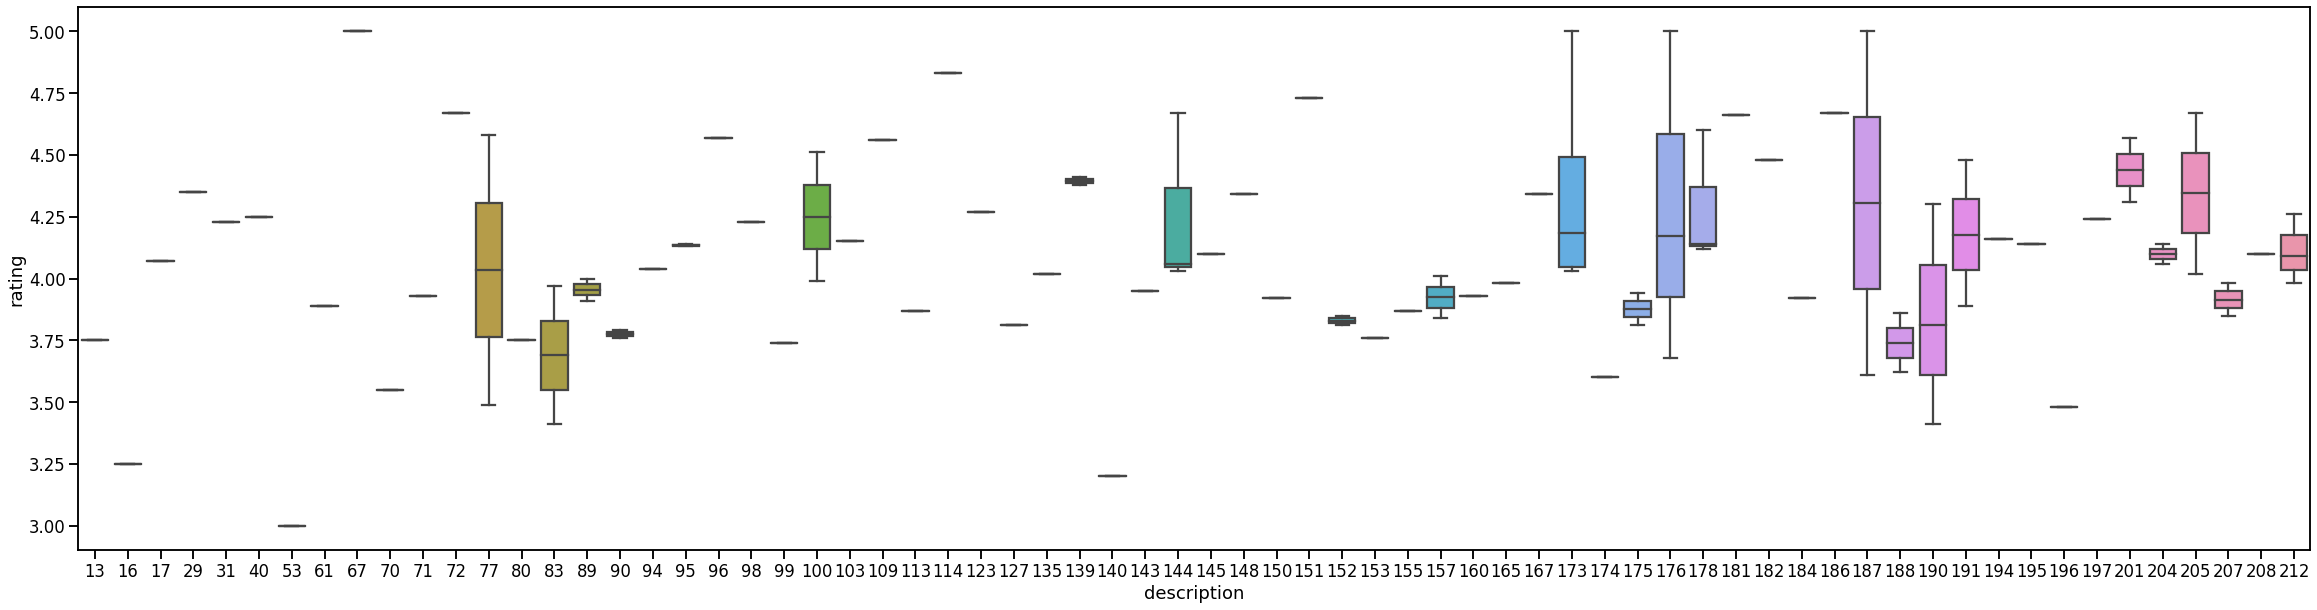

In [56]:
fig = plt.subplots(figsize=(40,10))
sns.boxplot(data=df[df['description']>1].sort_values('description')[0:100],x='description',y='rating')

- Dựa vào boxplot cũng có thể được sự phân bố và ảnh hưởng của thuộc tính này ảnh hưởng đến rating.

## Awards

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



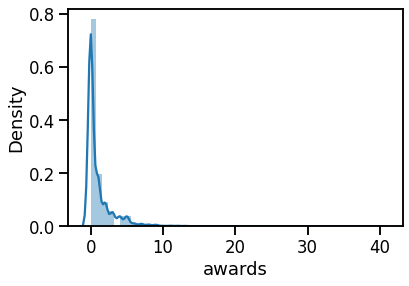

In [57]:
sns.distplot(df['awards'])
plt.show()

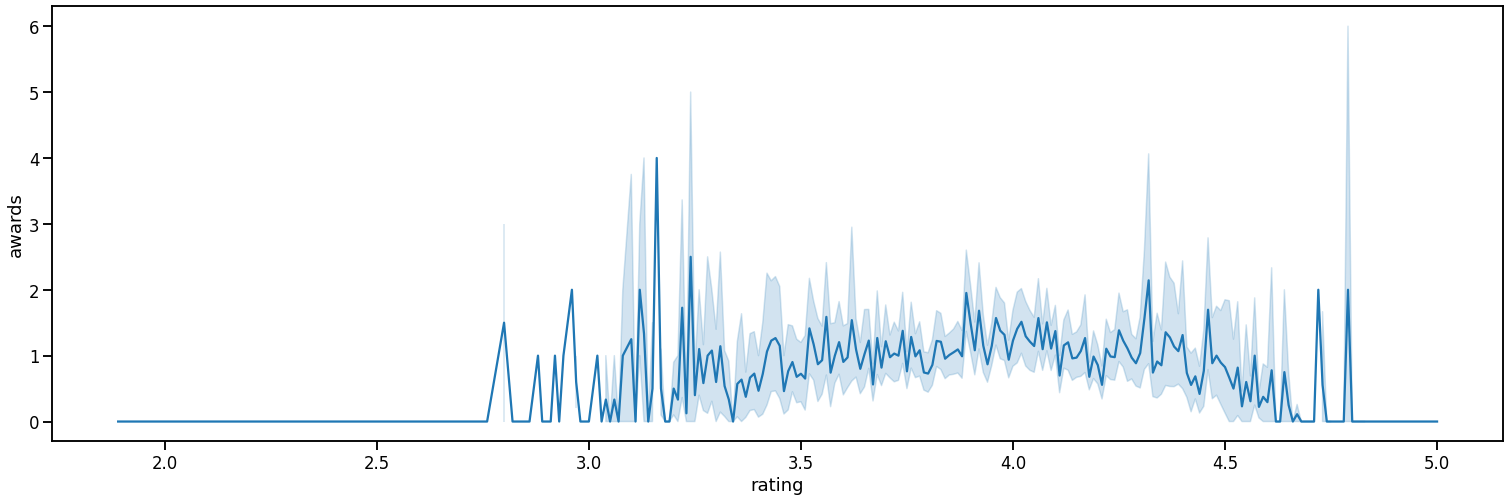

In [58]:
fig = plt.gcf()
fig.set_size_inches(26, 8)
sns.lineplot(x="rating", y="awards", data=df)

In [59]:
aw=df['awards'].value_counts().head(50).reset_index()
aw.columns=['awards','count']
aw

,awards,count
0,0,5070
1,1,1276
2,2,606
3,3,364
4,5,263
5,4,258
6,6,73
7,7,64
8,8,45
9,9,40


Text(0.5, 1.0, 'Awards count')

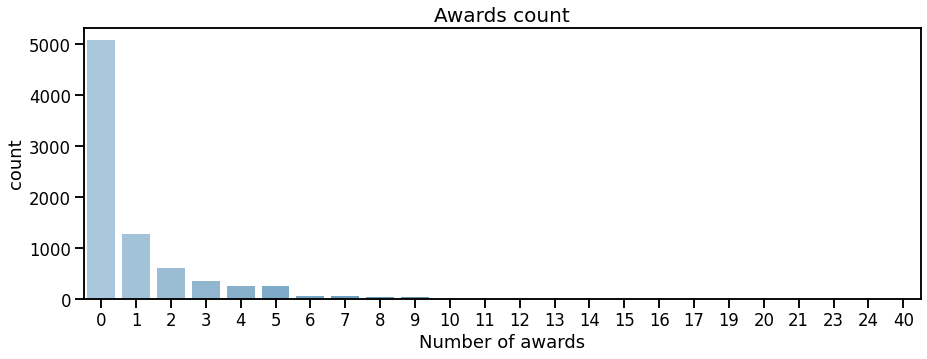

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x='awards',y='count',data=aw, palette="Blues_d")
plt.xlabel('Number of awards')
plt.title('Awards count',size=20)

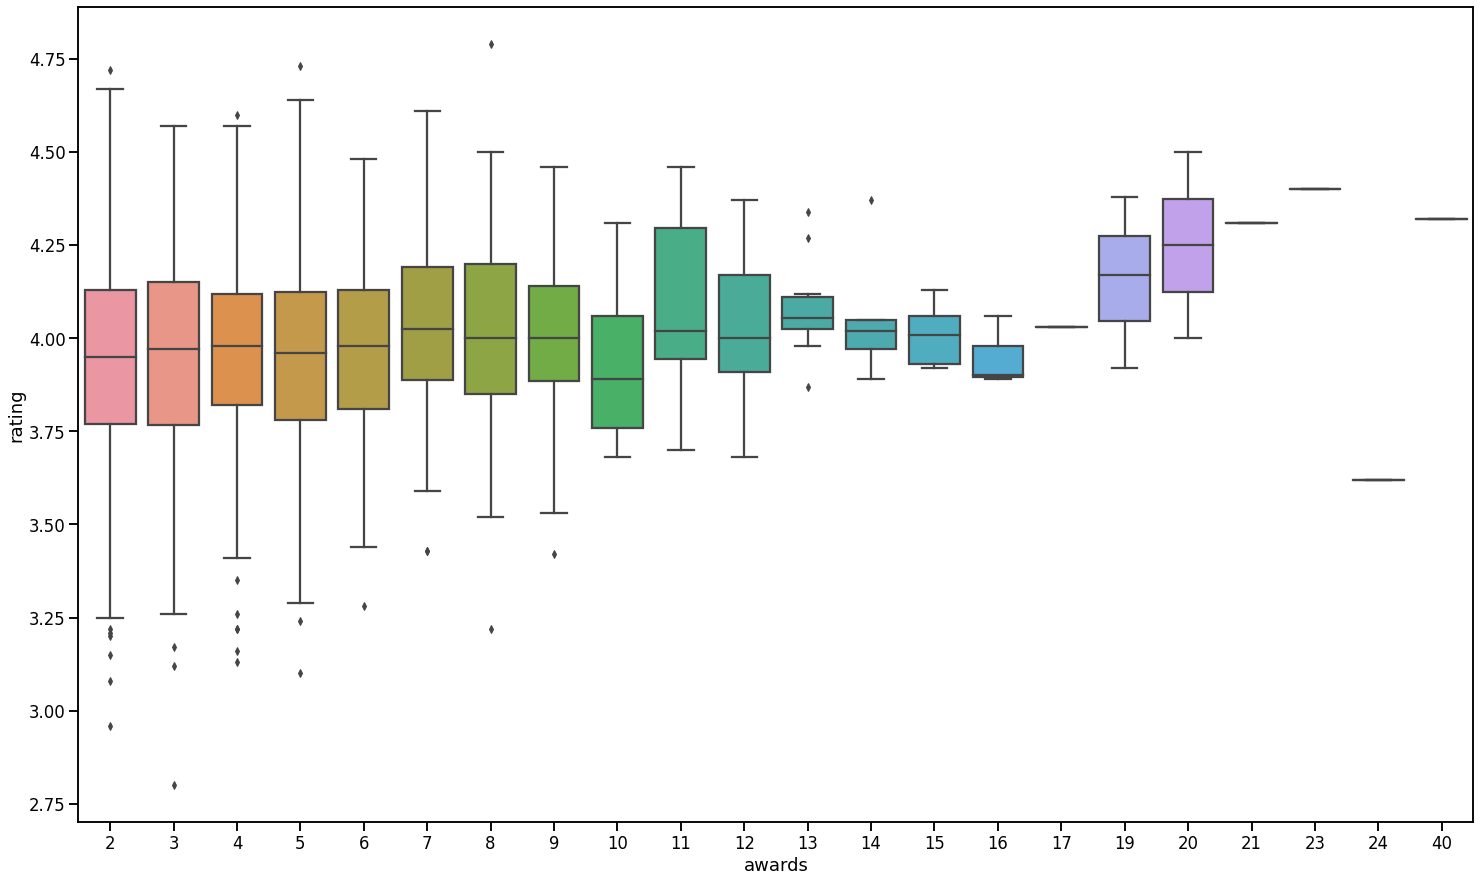

In [61]:
fig = plt.subplots(figsize=(25,15))
sns.boxplot(data=df[df['awards']>1].sort_values('awards')[0:5000],x='awards',y='rating')

- Có thể thấy thì giải thưởng có ảnh hưởng đến rating những xem hình boxlot thì chưa thấy sự rõ rệt. CHỉ nhuwgnx quyển sắc có rating cao mới cho thấy sự khác biệt.